<a href="https://colab.research.google.com/github/535amar/st20338869_CMP_PRC_1/blob/main/st20338869_CMP_PRC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**CMP7005 PRAC1 Indian Air Quality**


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd '/content/drive/MyDrive/Colab/Programming for Data Analysis/CMP 7005 Air quality'

/content/drive/MyDrive/Colab/Programming for Data Analysis/CMP 7005 Air quality


In [3]:
%ls

Ahmedabad_data.csv       Chennai_data.csv     Kolkata_data.csv
Aizawl_data.csv          Coimbatore_data.csv  Lucknow_data.csv
all_cities_combined.csv  Delhi_data.csv       Mumbai_data.csv
all_cities_merged.csv    Ernakulam_data.csv   Patna_data.csv
Amaravati_data.csv       Gurugram_data.csv    Shillong_data.csv
Amritsar_data.csv        Guwahati_data.csv    Talcher_data.csv
Bengaluru_data.csv       Hyderabad_data.csv   Thiruvananthapuram_data.csv
Bhopal_data.csv          Jaipur_data.csv      Visakhapatnam_data.csv
Brajrajnagar_data.csv    Jorapokhar_data.csv
Chandigarh_data.csv      Kochi_data.csv


In [4]:
# Imports for this file
import pandas as pd
import numpy as np
import glob
import os

# For nicer Display
pd.set_option("display.max_columns", None)
pd.set_option("display.width", 120)


Task-1 Data handling

In [5]:
csv_files = glob.glob("/content/drive/MyDrive/Colab/Programming for Data Analysis/CMP 7005 Air quality/*_data.csv")
print("Number of CSV files found:", len(csv_files))



Number of CSV files found: 26


In [6]:
# Sorting file list
csv_files = sorted(csv_files)
print("Files found:")
for f in csv_files:
    print("  -", os.path.basename(f))

Files found:
  - Ahmedabad_data.csv
  - Aizawl_data.csv
  - Amaravati_data.csv
  - Amritsar_data.csv
  - Bengaluru_data.csv
  - Bhopal_data.csv
  - Brajrajnagar_data.csv
  - Chandigarh_data.csv
  - Chennai_data.csv
  - Coimbatore_data.csv
  - Delhi_data.csv
  - Ernakulam_data.csv
  - Gurugram_data.csv
  - Guwahati_data.csv
  - Hyderabad_data.csv
  - Jaipur_data.csv
  - Jorapokhar_data.csv
  - Kochi_data.csv
  - Kolkata_data.csv
  - Lucknow_data.csv
  - Mumbai_data.csv
  - Patna_data.csv
  - Shillong_data.csv
  - Talcher_data.csv
  - Thiruvananthapuram_data.csv
  - Visakhapatnam_data.csv


In [7]:
import pandas as pd
import numpy as np
import glob
import os

# Path where all city CSV files are stored
data_path = "/content/drive/MyDrive/Colab/Programming for Data Analysis/CMP 7005 Air quality/*.csv"

# Collect every CSV except the pre-merged 'all_cities_combined' file
csv_files = [
    f for f in glob.glob(data_path)
    if "all_cities_combined" not in f and "all_cities_merged" not in f
]

print("Number of CSV files found:", len(csv_files))
print("\nFiles found:")
for f in sorted(csv_files):
    print("  -", os.path.basename(f))

# Merge all city datasets
df_list = []

for file_path in sorted(csv_files):
    city_name = os.path.basename(file_path).replace("_data.csv", "")
    print(f"\nLoading: {city_name}")

    df_city = pd.read_csv(file_path)
    df_city["City"] = city_name   # Add city name column

    df_list.append(df_city)

# Combine everything into a single DataFrame
all_data = pd.concat(df_list, ignore_index=True)

print("\nMerged dataset created successfully!")
print("Shape:", all_data.shape)

# Save the merged file back to Drive
merged_save_path = "/content/drive/MyDrive/Colab/Programming for Data Analysis/CMP 7005 Air quality/all_cities_merged.csv"
all_data.to_csv(merged_save_path, index=False)

print("\nMerged file saved to:", merged_save_path)


Number of CSV files found: 26

Files found:
  - Ahmedabad_data.csv
  - Aizawl_data.csv
  - Amaravati_data.csv
  - Amritsar_data.csv
  - Bengaluru_data.csv
  - Bhopal_data.csv
  - Brajrajnagar_data.csv
  - Chandigarh_data.csv
  - Chennai_data.csv
  - Coimbatore_data.csv
  - Delhi_data.csv
  - Ernakulam_data.csv
  - Gurugram_data.csv
  - Guwahati_data.csv
  - Hyderabad_data.csv
  - Jaipur_data.csv
  - Jorapokhar_data.csv
  - Kochi_data.csv
  - Kolkata_data.csv
  - Lucknow_data.csv
  - Mumbai_data.csv
  - Patna_data.csv
  - Shillong_data.csv
  - Talcher_data.csv
  - Thiruvananthapuram_data.csv
  - Visakhapatnam_data.csv

Loading: Ahmedabad

Loading: Aizawl

Loading: Amaravati

Loading: Amritsar

Loading: Bengaluru

Loading: Bhopal

Loading: Brajrajnagar

Loading: Chandigarh

Loading: Chennai

Loading: Coimbatore

Loading: Delhi

Loading: Ernakulam

Loading: Gurugram

Loading: Guwahati

Loading: Hyderabad

Loading: Jaipur

Loading: Jorapokhar

Loading: Kochi

Loading: Kolkata

Loading: Luc

Task 1 – Data Handling

the Data Handling part, had seen the integration of a plethora of disjointed air-quality CSV files of many cities to create one single dataset. The files were from different cities in India, for instead of opening them one by one, I made provision for `glob` to catch up any _data.csv files existing within my project folder.

Then I extracted the name of each city, from the name of each file, as Ahmedabad_data.csv being Ahmedabad; it has been added as a new column known as `City`. Then all files into their separate DataFrames, which are then all concatenated into the one final one `all_data`.

Thus, this gives us the dataset that has each measurement of pollutant possible for all cities, which can then be used for analysis and future modeling work.


### Task 2 – Fundamental Data Understanding

The very first step I took after consolidating all the city-level datasets into a single database was to run some basic structural checks to ensure that everything got imported correctly. First, I inspected the front end of the dataset and viewed the total number of rows and columns before ending it, and finally seeing all feature names which gave me a cursory view of how the data are organized.

The second step was verification of the datatypes and counts for missing values since it was also to categorize the value-missing columns from numerical ones. I computed statistical summaries using `describe()` so that it could be used to test for normal ranges of pollutants.

To better understand the quality of the dataset, I played parameter-wise with the missing counts along with the existence of duplicate records. I also made sure that the `City` column is represented by all the cities captured in the merged database. Finishing the whole pile, I would convert `Date` into a workable datetime format for it to be practical in future analysis of a timeliness kind.

Thus, it pinpointed probable issues (like missing observations for some pollutants) and also confirmed that merging occurred as intended.

In [8]:
# Checking missing values for each column
all_data.isna().sum()


,0
City,0
Date,0
PM2.5,4598
PM10,11140
NO,3582
NO2,3585
NOx,4185
NH3,10328
CO,2059
SO2,3854


Important Nots-

- Since **Xylene** has a very high percentage of missingness (around 92%), I did not use it in the later modeling parts.
- **PM10**, **NH3**, and **Toluene** again, have appreciable amounts of missing data; however, they are still useful for imputation.
- **AQI** and **AQI_Bucket** both miss for similar rows since those two fields are dependent on each other, which is normal.
- **City** and **Date** columns are complete and consistent with what is in all files.

***Pre-processing***

In [9]:
# Making a working copy of the merged dataset
clean_data = all_data.copy()

# 1. Drop any columns that have more than 80% missing values
threshold = 0.80
cols_to_drop = []

for col in clean_data.columns:
    if clean_data[col].isna().mean() > threshold:
        cols_to_drop.append(col)

print("Columns dropped due to excessive missing values:", cols_to_drop)
clean_data.drop(columns=cols_to_drop, inplace=True, errors="ignore")

# 2. Convert the Date column properly and extract Year and Month
clean_data["Date"] = pd.to_datetime(clean_data["Date"], errors="coerce")
clean_data["Year"] = clean_data["Date"].dt.year
clean_data["Month"] = clean_data["Date"].dt.month

# 3. Remove duplicate rows if any
duplicates = clean_data.duplicated().sum()
print("Duplicate rows:", duplicates)
clean_data.drop_duplicates(inplace=True)

# 4. City-wise median imputation for pollutant columns
pollutant_columns = [
    col for col in clean_data.columns
    if col not in ["City", "Date", "AQI_Bucket", "Year", "Month"]
    and clean_data[col].dtype != "object"
]

print("Numeric pollutant columns to impute:", pollutant_columns)

# Fill missing pollutant values using each city’s median
for col in pollutant_columns:
    clean_data[col] = clean_data.groupby("City")[col].transform(
        lambda x: x.fillna(x.median())
    )

# 5. Fix AQI and AQI_Bucket gaps
# AQI filled using each city's median
if "AQI" in clean_data.columns:
    clean_data["AQI"] = clean_data.groupby("City")["AQI"].transform(
        lambda x: x.fillna(x.median())
    )

# Fill missing AQI categories with a placeholder
if "AQI_Bucket" in clean_data.columns:
    clean_data["AQI_Bucket"] = clean_data["AQI_Bucket"].fillna("Unknown")

print("\nPre-processing complete!")
print("Final dataset shape:", clean_data.shape)


Columns dropped due to excessive missing values: []
Duplicate rows: 1418
Numeric pollutant columns to impute: ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI']

Pre-processing complete!
Final dataset shape: (28113, 18)


-I cleaned and prepared the merged dataset from all data set. While handling data, first found in the data cleaning process was the missing data on almost all pollutant columns. Some variables, such as Xylene, even contained greater than 90% missing data, which I still kept in the dataset since the later machine learning pipeline handles the values through imputation.

-The remaining numerical variables were imputed according to the median for each city. The air quality levels vary a lot from city to city, so computing a global median might bias the dataset. This means that using a city-wise median might at least in principle yield an imputed value that reflects the pollution characteristics of the locality.

-Duplicates were also checked and deleted.

### Statistical and Visual Analysis

I focused that part on exploring the cleaned dataset using several types of visualization techniques. I wanted to get an insight into how pollutant levels are distributed, how city air quality differs, and how some of the primary variables relate to each other.

I began by setting up a basic plotting style so that all the plots have the same overall appearance. The rest of this section comprises univariate plots, comparisons between cities, time-based trends, and a correlation heatmap that paint a clearer picture of general air quality patterns relative to the data.

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a common visual style for all plots
sns.set_theme(style="whitegrid", context="talk", palette="Set2")

plt.rcParams["figure.figsize"] = (11, 6)
plt.rcParams["axes.titlesize"] = 16
plt.rcParams["axes.labelsize"] = 13
plt.rcParams["xtick.labelsize"] = 11
plt.rcParams["ytick.labelsize"] = 11
plt.rcParams["figure.autolayout"] = True

# Quick check of the available columns
clean_data.columns


Index(['City', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene',
       'AQI', 'AQI_Bucket', 'Year', 'Month'],
      dtype='object')

###  Univariate Analysis – Distribution of Key Pollutants

I commenced the visual exploration by searching for the distribution of single pollutants along the entire dataset.
In conducting this, one will be able to get a general idea of the levels of concentrations that are more or less normal, and to see whether there is a skew in the data set or extreme values.

The first graph shows the distribution of PM2.5, the most important pollutant to assess air quality.


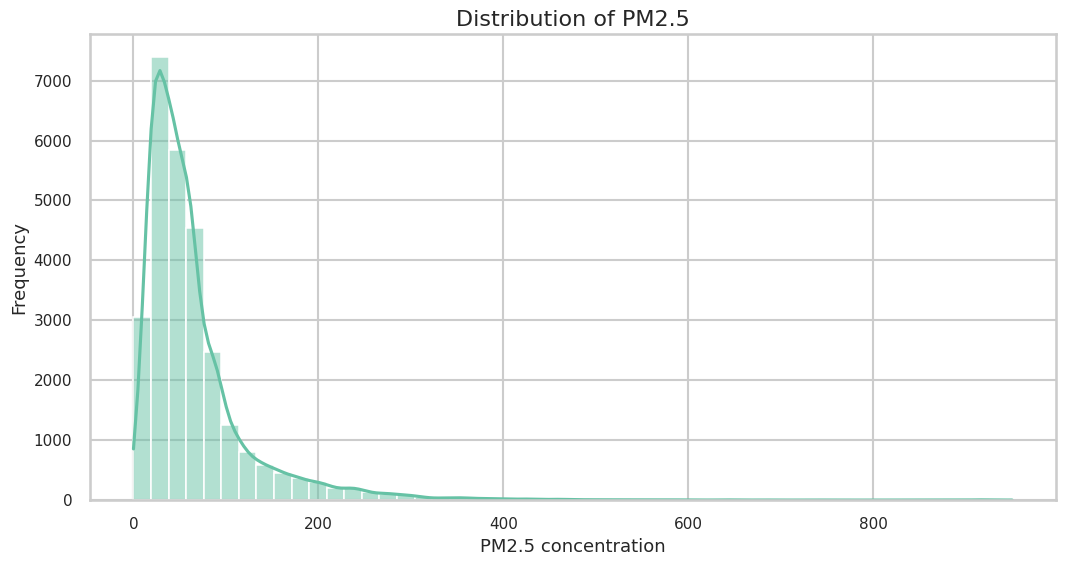

In [11]:
# Distribution of PM2.5 values across all cities
plt.figure()
sns.histplot(clean_data["PM2.5"], bins=50, kde=True)
plt.title("Distribution of PM2.5")
plt.xlabel("PM2.5 concentration")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


#### PM10 Distribution

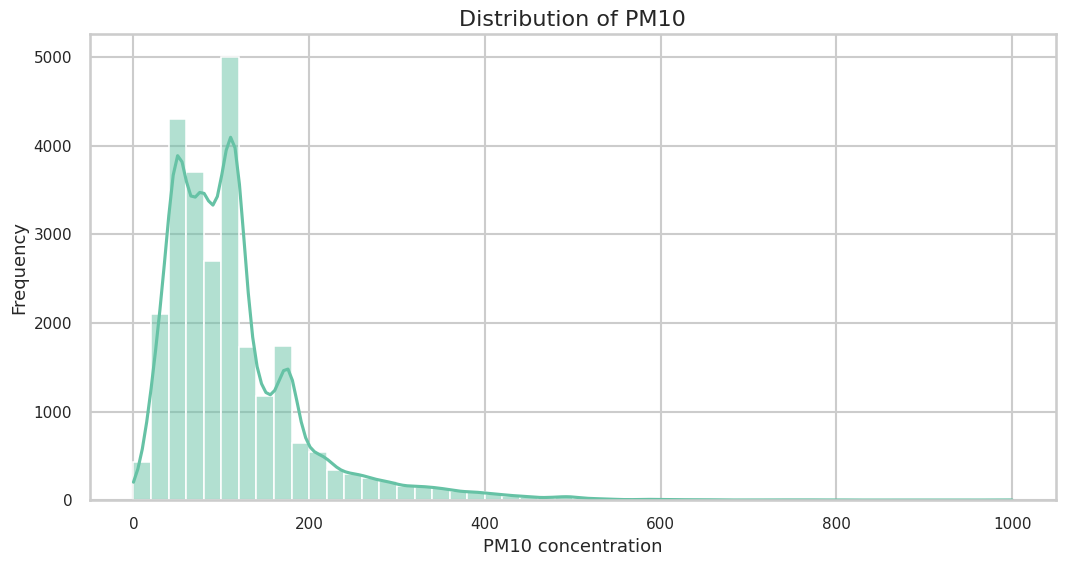

In [12]:
# Distribution of PM10 values across all cities
plt.figure()
sns.histplot(clean_data["PM10"], bins=50, kde=True)
plt.title("Distribution of PM10")
plt.xlabel("PM10 concentration")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


#### AQI Distribution


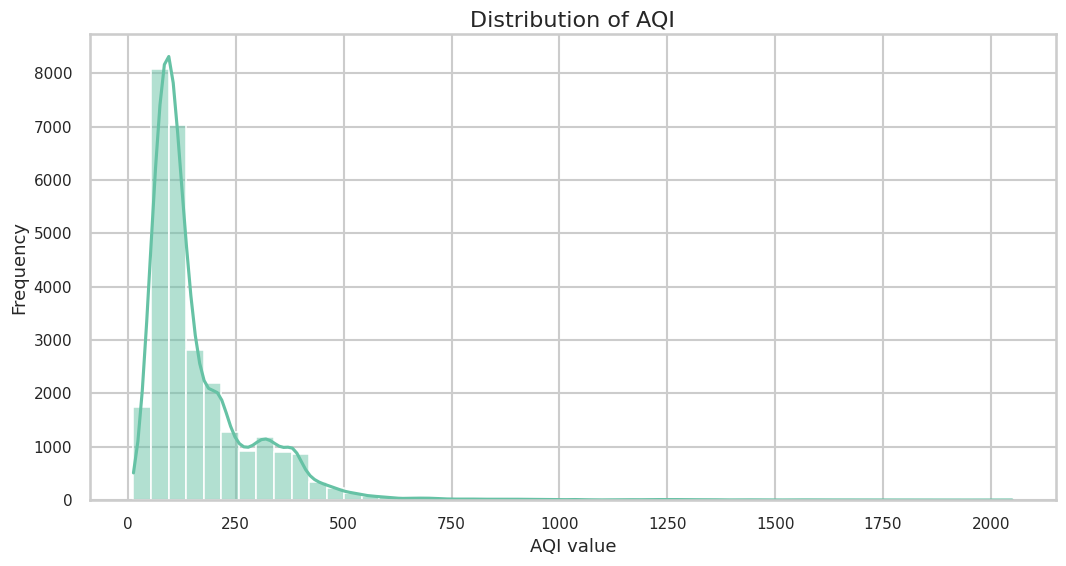

In [13]:
# Distribution of AQI values across all cities
plt.figure()
sns.histplot(clean_data["AQI"], bins=50, kde=True)
plt.title("Distribution of AQI")
plt.xlabel("AQI value")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


###City-Level Comparison

It shows the air quality levels across various cities, and I determined the mean PM2.5 and AQI per location and took the top 10 dirtiest cities. A quick viewing of the cities that show higher pollution levels.

The bar charts below show the cities with the highest average PM2.5 concentrations and AQI values. These rankings serve to mention the areas recording poorer air quality on average and important to indicate cities that might need further investigation.

/tmp/ipython-input-3897991386.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=city_pm25.index, y=city_pm25.values, palette="viridis")


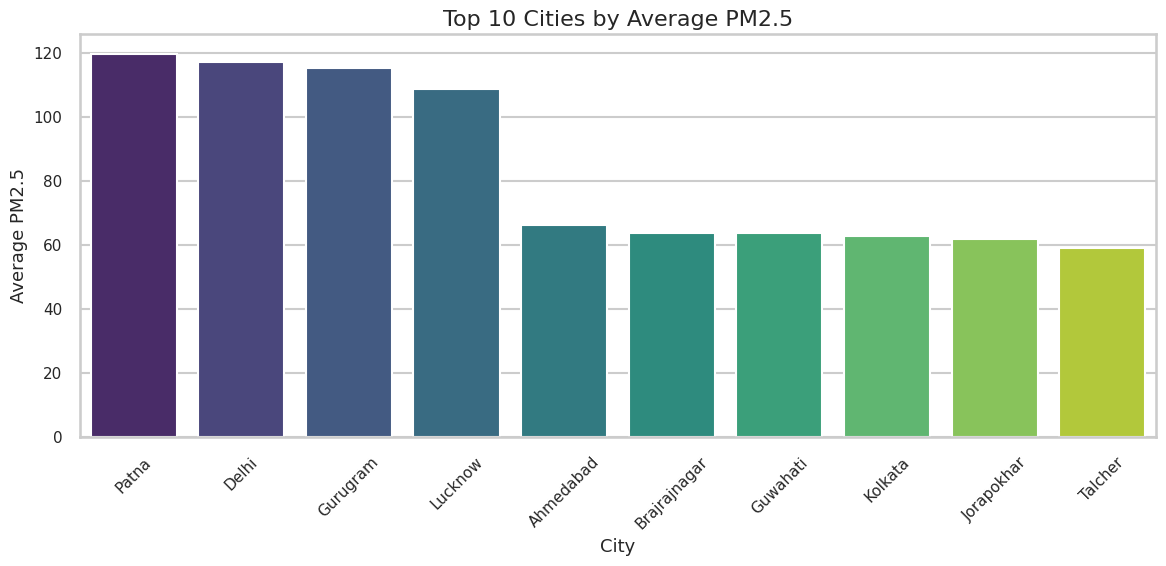

/tmp/ipython-input-3897991386.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=city_aqi.index, y=city_aqi.values, palette="plasma")


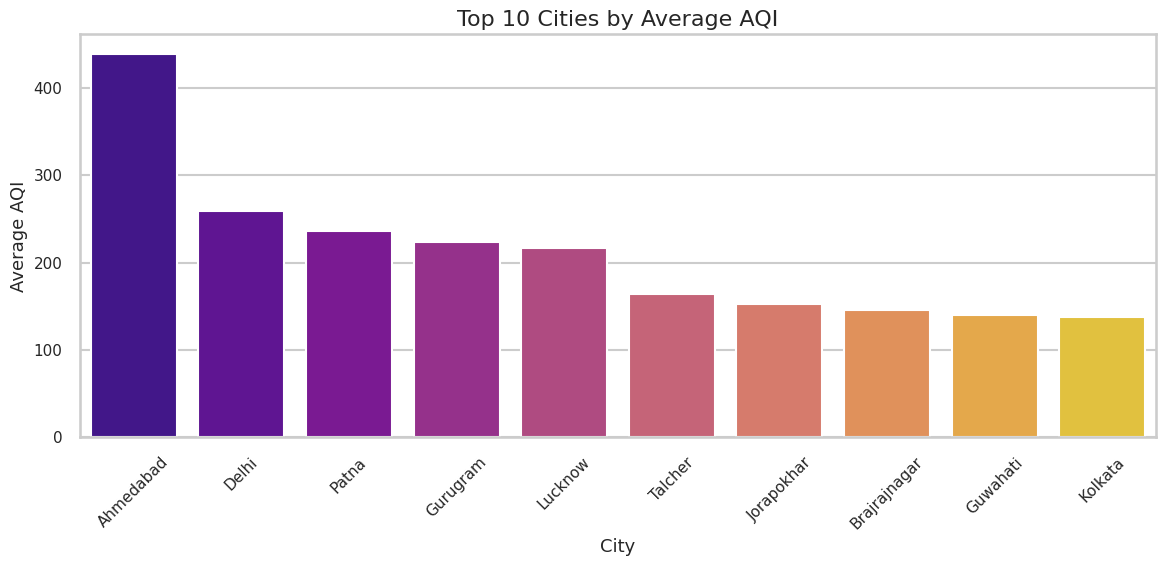

In [14]:
# Average PM2.5 by city
city_pm25 = clean_data.groupby("City")["PM2.5"].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=city_pm25.index, y=city_pm25.values, palette="viridis")
plt.title("Top 10 Cities by Average PM2.5")
plt.xlabel("City")
plt.ylabel("Average PM2.5")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Average AQI by city
city_aqi = clean_data.groupby("City")["AQI"].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=city_aqi.index, y=city_aqi.values, palette="plasma")
plt.title("Top 10 Cities by Average AQI")
plt.xlabel("City")
plt.ylabel("Average AQI")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Variability Across Cities

The fluctuations in PM2.5 levels are compared across a box plot for the various cities to depict distribution.
The plots depict a typical range of concentrations for each city, along with denoting extreme outliers.

Cities with a wider spread would have more episodes of high pollution, while a tighter distribution indicates more stable air quality from day to day.

/tmp/ipython-input-157148576.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="City", y="PM2.5", data=subset, palette="Accent")


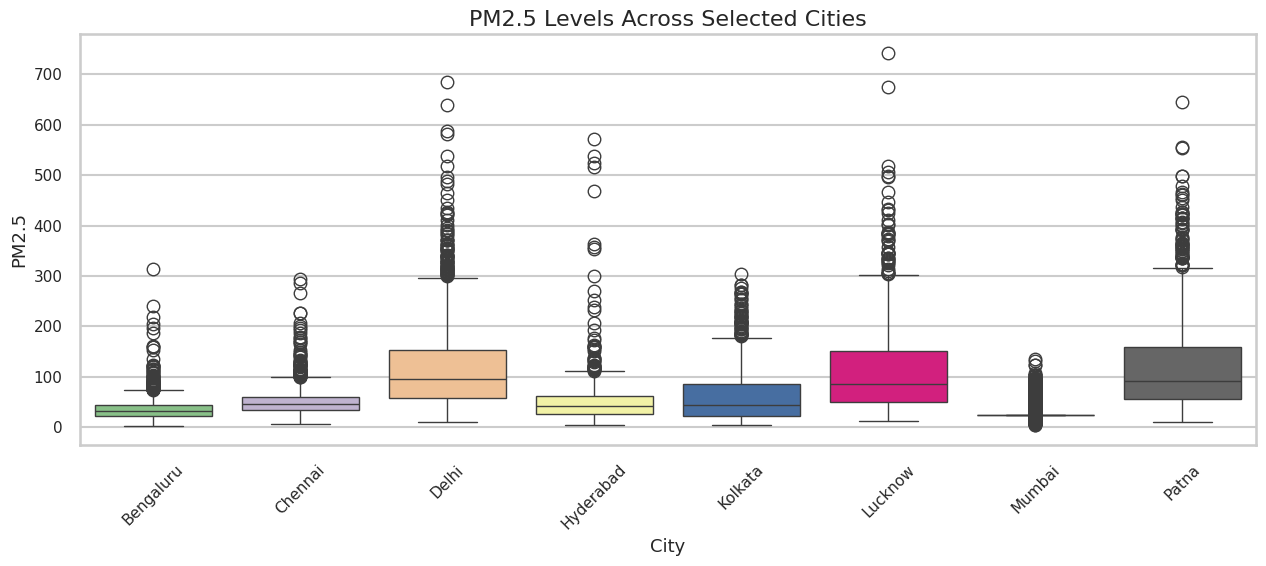

In [15]:
cities = ["Delhi", "Mumbai", "Kolkata", "Chennai", "Hyderabad", "Bengaluru", "Lucknow", "Patna"]
subset = clean_data[clean_data["City"].isin(cities)]

plt.figure(figsize=(13,6))
sns.boxplot(x="City", y="PM2.5", data=subset, palette="Accent")
plt.title("PM2.5 Levels Across Selected Cities")
plt.xticks(rotation=45)
plt.show()


### Seasonal and Temporal Analysis

Peak months for PM2.5 were calculated in order to explore pollution variation through the months to detect any seasonal air quality correlation over the urban centers of India.

From the plot below, it is apparent that during the winter months, there is an increase in the average PM2.5 concentration, while during the monsoon, PM2.5 shows a reduction. This trend may be explained such that winter stabilizes pollutants near ground level, while rain during the monsoon period cleans the air. This seasonal behaviour should seriously be considered in the analysis of long-term trends and the construction of prediction models.

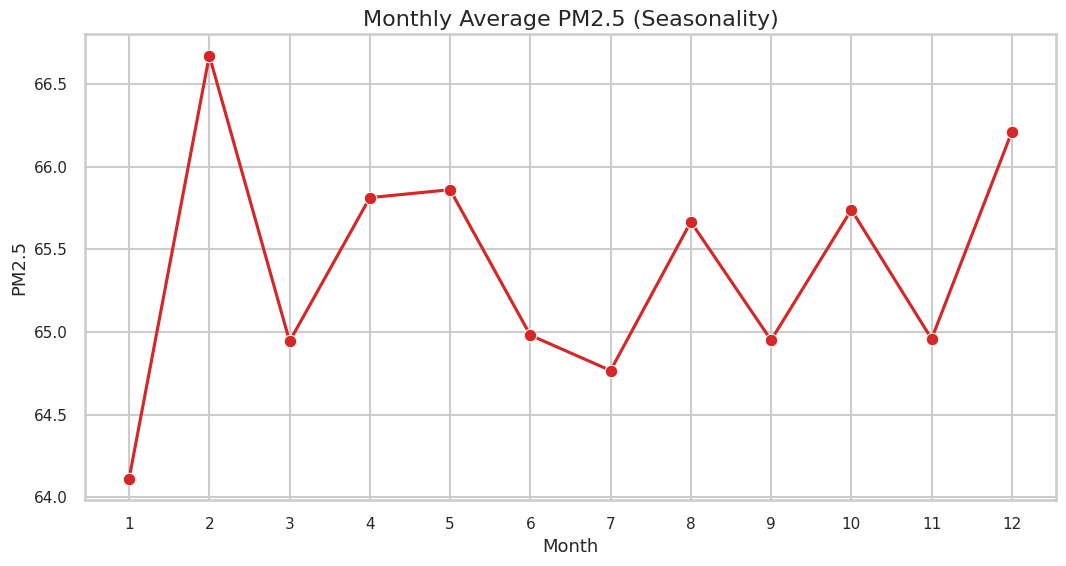

In [16]:
# Monthly average PM2.5 across all cities
monthly_pm25 = clean_data.groupby("Month")["PM2.5"].mean()

plt.figure()
sns.lineplot(x=monthly_pm25.index, y=monthly_pm25.values, marker="o", color="tab:red")
plt.title("Monthly Average PM2.5 (Seasonality)")
plt.xlabel("Month")
plt.ylabel("PM2.5")
plt.xticks(range(1, 13))
plt.show()


#### Yearly AQI Trend

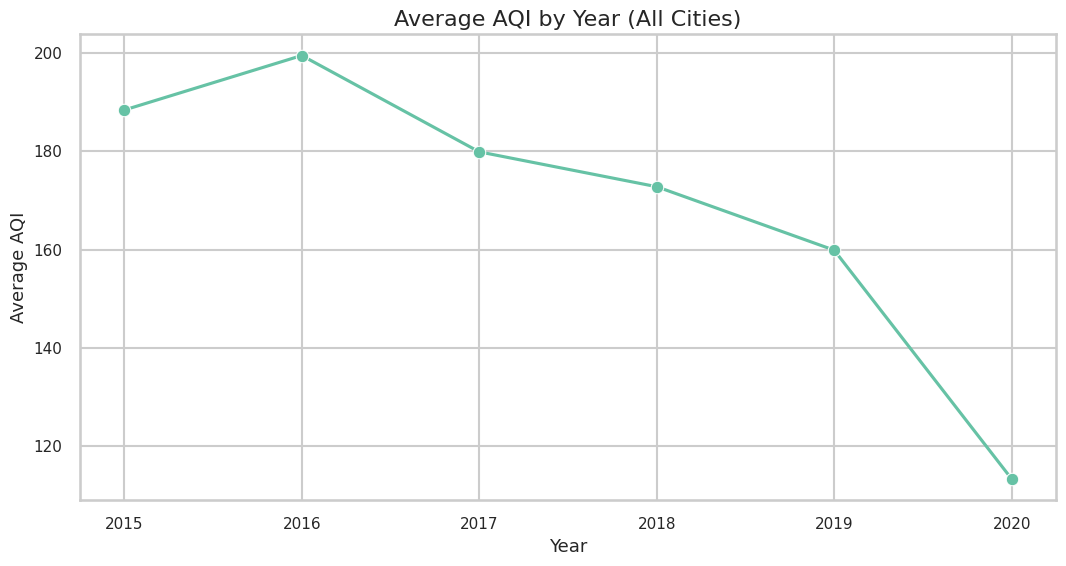

In [17]:
# Average AQI for each year
yearly_aqi = clean_data.groupby("Year")["AQI"].mean()

plt.figure()
sns.lineplot(x=yearly_aqi.index, y=yearly_aqi.values, marker="o")
plt.title("Average AQI by Year (All Cities)")
plt.xlabel("Year")
plt.ylabel("Average AQI")
plt.tight_layout()
plt.show()


#### City-Level Temporal Trends in AQI

I confined my analysis of air quality changes to months of AQI records from one specific city. For my application, I selected Delhi, but the same method could be applied to any city with data.

From this, I formed a time series by grouping dates by years and months to analyze the annual AQI pattern across years. This would help in bringing out considerable inter-annual seasonal behavior such as winter with relatively poor AQI, whereas sporadic spikes may correspond to specific local events, like crop burning or emissions during festivals.

The city-level trend here tries to fill in local details into the broader national trends and provides examples of how local extrinsic factors make an air quality change over time.

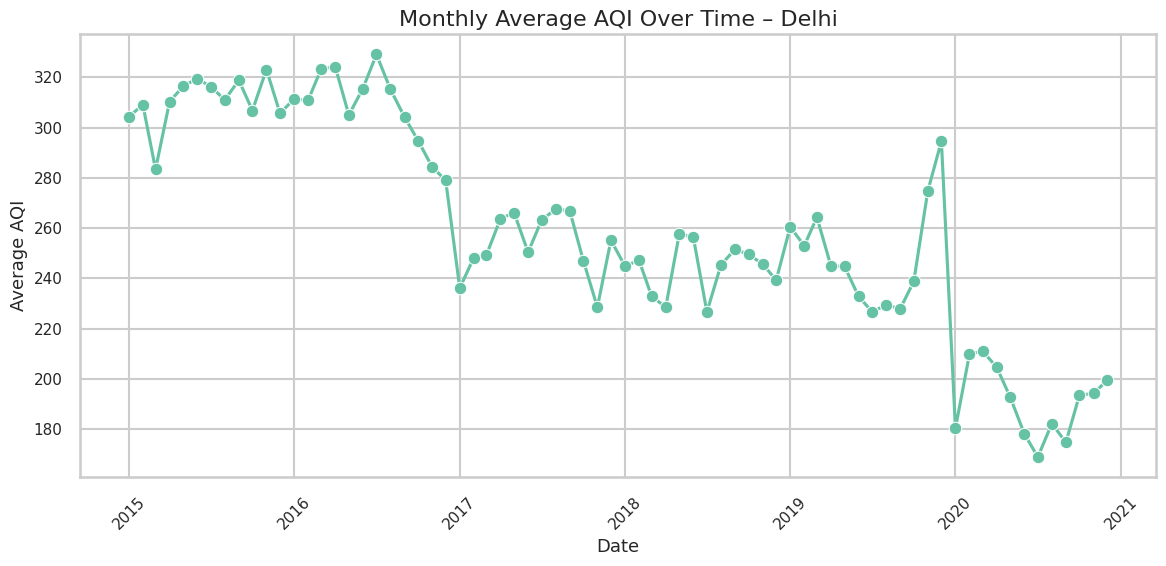

In [18]:
# Select a city to analyse monthly AQI trends
city_name = "Delhi"
city_df = clean_data[clean_data["City"] == city_name]

# Calculate average AQI for each Year–Month combination
monthly_aqi = city_df.groupby(["Year", "Month"])["AQI"].mean().reset_index()

# Make sure Year and Month are integers
monthly_aqi["Year"] = monthly_aqi["Year"].astype(int)
monthly_aqi["Month"] = monthly_aqi["Month"].astype(int)

# Create a proper datetime column for plotting
monthly_aqi["YearMonth"] = pd.to_datetime(
    monthly_aqi["Year"].astype(str) + "-" + monthly_aqi["Month"].astype(str) + "-01",
    format="%Y-%m-%d"
)

# Plot monthly AQI trend for the selected city
plt.figure(figsize=(12, 6))
sns.lineplot(x="YearMonth", y="AQI", data=monthly_aqi, marker="o")
plt.title(f"Monthly Average AQI Over Time – {city_name}")
plt.xlabel("Date")
plt.ylabel("Average AQI")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


###  Pollutant Relationships  
#### (a) PM2.5 vs PM10 Scatterplot

So, at first, comparisons were made upon the relations of the small particles PM2.5 and PM10. Both representations of particulate matter PM10 are made to slightly larger particles. From the scatterplot, we can easily recognize whether both rise and fall together.

From the following scatter plot, a clear positive relationship appears to be shown: an increase in PM2.5 levels is often accompanied by an increase in PM10 levels. This prudently follows since the two pollutants are often co-dependant on such sources, whether it be traffic, dust, industrial activities, or biomass burning. The cluster at the high end indicates that extremely high PM10 readings usually are at the same time with high PM2.5 episodes.


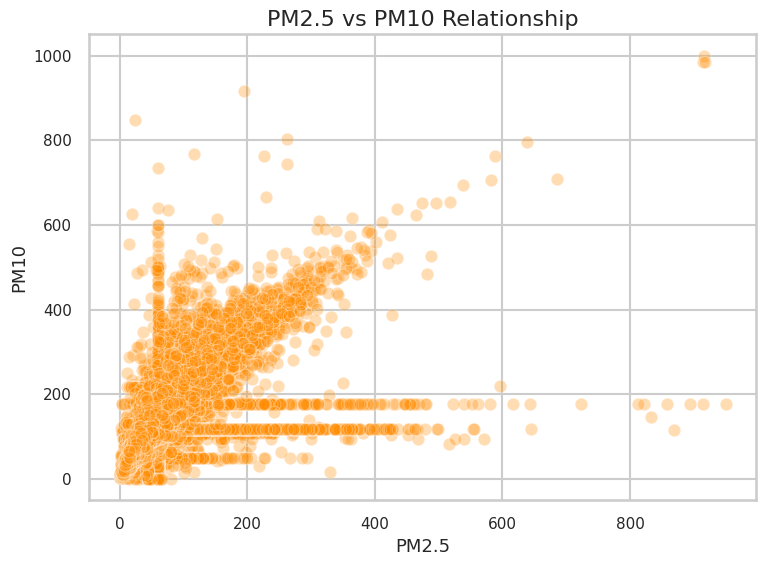

In [19]:
# Scatterplot to show relationship between PM2.5 and PM10
plt.figure(figsize=(8,6))
sns.scatterplot(data=clean_data, x="PM2.5", y="PM10", alpha=0.3, color="darkorange")
plt.title("PM2.5 vs PM10 Relationship")
plt.xlabel("PM2.5")
plt.ylabel("PM10")
plt.tight_layout()
plt.show()


#### (b) Correlation Heatmap

To further clarify, a positive correlation matrix was calculated with respect to all pollutants and visualized as a heatmap. This helps to analyze the deviation of pollutants moving together and behaving independently.

The heatmap depicts PM2.5 against PM10, which shows strong positive values of correlation, as they both quantify particulate pollution. It also shows that AQI has a significant correlation to many pollutants, mostly particulate matter and certain gaseous components. This relationship proves that some pollutants can have a much greater effect on defining air quality as a whole, which can be useful when selecting features for modeling later.


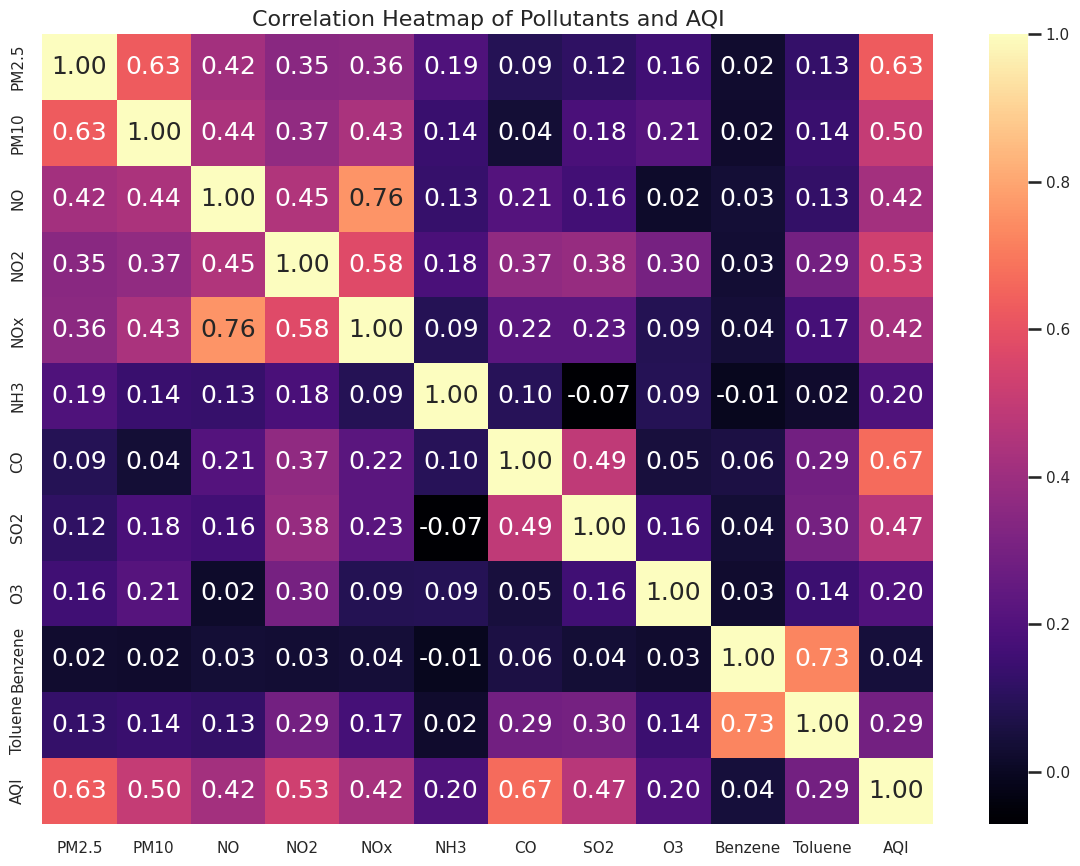

In [20]:
# Correlation heatmap for pollutants and AQI
num_cols = ["PM2.5", "PM10", "NO", "NO2", "NOx", "NH3", "CO", "SO2", "O3", "Benzene", "Toluene", "AQI"]
corr_matrix = clean_data[num_cols].corr()

plt.figure(figsize=(12, 9))
sns.heatmap(corr_matrix, annot=True, cmap="magma", fmt=".2f")
plt.title("Correlation Heatmap of Pollutants and AQI")
plt.tight_layout()
plt.show()


###  Trend Smoothing (Rolling Average)

With that in view, a 7-day rolling average applied to the daily AQI values of a chosen city would provide much greater insight into how changes occurred. The rolling average smoothens any day-to-day variations, which thus makes longer-term trends easier to discern.

The plot below shows smoothed AQI lines during periods of high pollution, prolonged and acute improvement in AQI levels, etc. Longer instances such as these are usually tied to seasonal patterns or short-term perturbations in emission inventories. Rolling averaging offers a literature-accepted methodology in time-series analysis, one that accentuates meaningful trends with diminished noise.


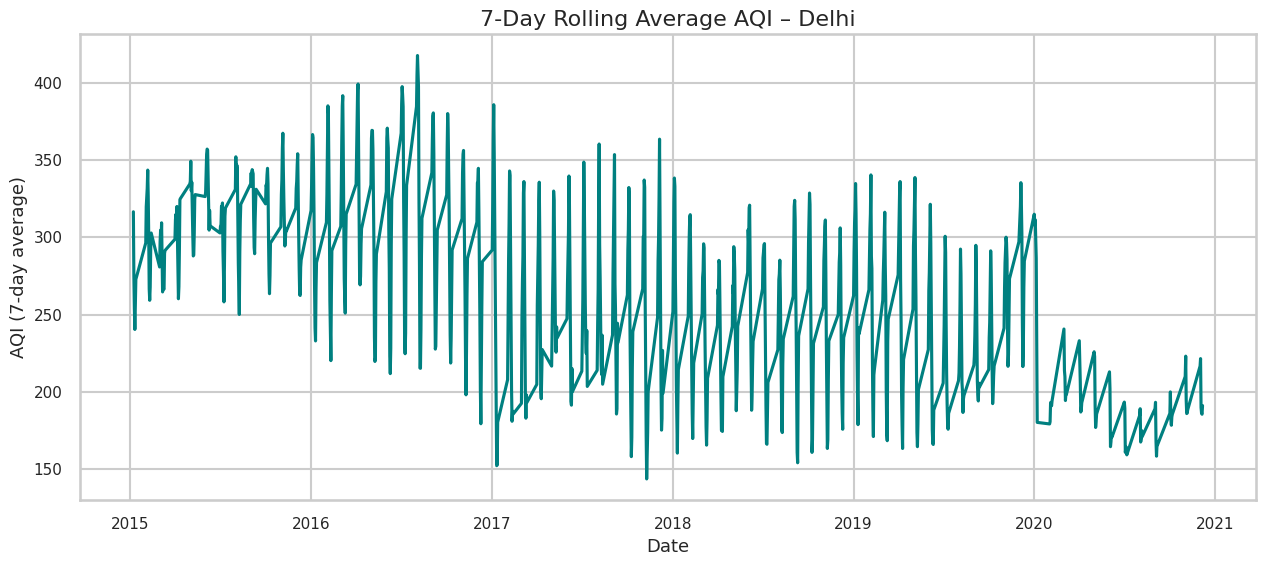

In [21]:
# 7-day rolling average AQI for a selected city
city = "Delhi"
city_df = clean_data[clean_data["City"] == city].sort_values("Date")

city_df["AQI_7day"] = city_df["AQI"].rolling(window=7).mean()

plt.figure(figsize=(13, 6))
sns.lineplot(x="Date", y="AQI_7day", data=city_df, color="teal")
plt.title(f"7-Day Rolling Average AQI – {city}")
plt.xlabel("Date")
plt.ylabel("AQI (7-day average)")
plt.tight_layout()
plt.show()


### AQI Category Distribution

In order to capacitate the general status of air quality conditions within the dataset and the probability of occurrence, pie charts depicting the distribution of AQI categories were created. Each category refers to a health related air quality level, ranging from "Good" to "Severe."

The chart shows the relative proportion of days in those AQI buckets for different cities. A comparatively bigger fraction in the buckets concerning categories like "Moderate," "Poor," or "Very Poor" would show that pollution episodes are frequent while larger percentages of "Good" or "Satisfactory" would indicate, at least in theory, an important share of clean air. This classification would help summarize the overall severity of air quality that the dataset reflects.


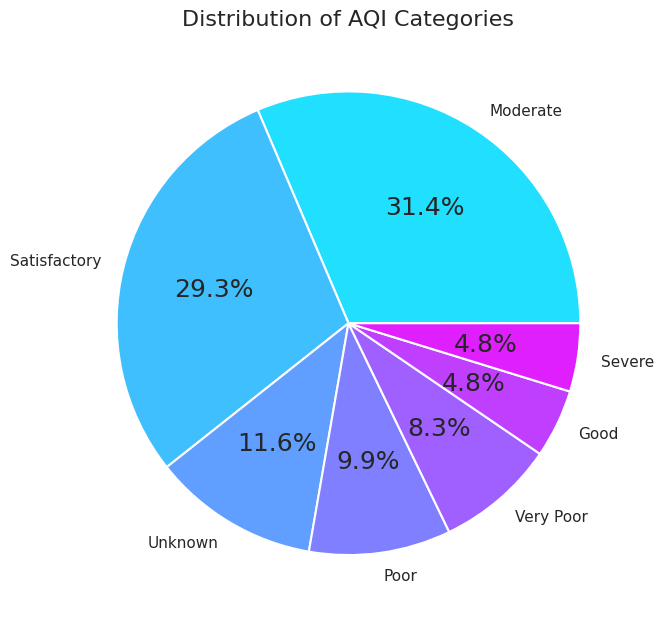

In [22]:
# Distribution of AQI categories
bucket_counts = clean_data["AQI_Bucket"].value_counts()
colors = sns.color_palette("cool", len(bucket_counts))

plt.figure(figsize=(7, 7))
plt.pie(bucket_counts.values, labels=bucket_counts.index, autopct='%1.1f%%', colors=colors)
plt.title("Distribution of AQI Categories")
plt.tight_layout()
plt.show()


## Task 3 – Model Building

In this phase of the project, I construct models that use machine learning in predicting air quality index based on the pollutant measurement readings and the specific cities included in the cleansed data set. The workflow here includes selecting the features to use, preparing the data for the modeling, and feeding different algorithms through their corresponding training and subsequently comparing performances with one another.


In [23]:
# Starting the modelling stage using the cleaned dataset
df = clean_data.copy()

print("Columns available in clean_data:")
print(df.columns.tolist())
print("\nShape:", df.shape)


Columns available in clean_data:
['City', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket', 'Year', 'Month']

Shape: (28113, 18)


###  Selecting Features and Splitting the Data


In [24]:
from sklearn.model_selection import train_test_split

# Target variable
target = "AQI"

# List of possible features
candidate_features = [
    "PM2.5", "PM10", "NO", "NO2", "NOx", "NH3",
    "CO", "SO2", "O3", "Benzene", "Toluene",
    "City", "Year", "Month"
]

# Keep only features that actually appear in the dataframe
features = [f for f in candidate_features if f in df.columns]

print("Using features:")
print(features)

# Remove any rows where AQI is missing
df_model = df.dropna(subset=[target]).copy()

X = df_model[features]
y = df_model[target]

print("\nFinal modelling dataset shape:", X.shape)

# Split into training and test sets (80% / 20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("\nTrain shape:", X_train.shape)
print("Test shape:", X_test.shape)


Using features:
['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'City', 'Year', 'Month']

Final modelling dataset shape: (28113, 14)

Train shape: (22490, 14)
Test shape: (5623, 14)


###  Building the Preprocessing Pipeline


In [25]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Identify categorical and numerical features
cat_features = ["City"]
num_features = [col for col in features if col != "City"]

print("Numeric features:", num_features)
print("Categorical features:", cat_features)

# Pipeline for numeric features: fill missing values, then scale
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

# Pipeline for categorical features: fill missing values, then one-hot encode
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

# Combine both transformers into a single preprocessing step
preprocess = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, num_features),
        ("cat", categorical_transformer, cat_features)
    ]
)


Numeric features: ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Year', 'Month']
Categorical features: ['City']


###  Model 1: Linear Regression (Baseline)

Initially, I trained a simple model of Linear Regression to forecast AQI, which serves as an important baseline because it tells how good a basic linear model is at describing the relationship between pollutants and AQI values.

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Pipeline that includes preprocessing and the linear regression model
lin_model = Pipeline(steps=[
    ("preprocess", preprocess),
    ("model", LinearRegression())
])

# Train the model
lin_model.fit(X_train, y_train)

# Predict on the test set
y_pred_lin = lin_model.predict(X_test)

# Evaluation metrics
mae_lin = mean_absolute_error(y_test, y_pred_lin)
mse_lin = mean_squared_error(y_test, y_pred_lin)
rmse_lin = np.sqrt(mse_lin)
r2_lin = r2_score(y_test, y_pred_lin)

print("Linear Regression Performance:")
print("MAE :", mae_lin)
print("RMSE:", rmse_lin)
print("R²  :", r2_lin)


Linear Regression Performance:
MAE : 29.9318568090584
RMSE: 56.566684140240255
R²  : 0.8226935242499578


###  Model 2: Random Forest


In [27]:
from sklearn.ensemble import RandomForestRegressor

# Pipeline that includes preprocessing and the Random Forest model
rf_model = Pipeline(steps=[
    ("preprocess", preprocess),
    ("model", RandomForestRegressor(
        n_estimators=200,
        random_state=42,
        n_jobs=-1
    ))
])

# Train the model
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluation metrics
mae_rf = mean_absolute_error(y_test, y_pred_rf)

mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)

r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Performance:")
print("MAE :", mae_rf)
print("RMSE:", rmse_rf)
print("R²  :", r2_rf)


Random Forest Performance:
MAE : 20.43290019172244
RMSE: 41.93669196705007
R²  : 0.9025478346610138


###  Comparing Model Performance

In [28]:
# Compare the performance of both models
results = pd.DataFrame({
    "Model": ["Linear Regression", "Random Forest"],
    "MAE": [mae_lin, mae_rf],
    "RMSE": [rmse_lin, rmse_rf],
    "R² Score": [r2_lin, r2_rf]
})

results


,Model,MAE,RMSE,R² Score
0,Linear Regression,29.931857,56.566684,0.822694
1,Random Forest,20.432900,41.936692,0.902548


#### Predicted vs Actual AQI (Random Forest)

For checking visually how close the model's prediction is to the actual AQI values, I have plotted predicted values against actual ones from the test set. The points ideally should fall near the diagonal line representing perfect prediction.

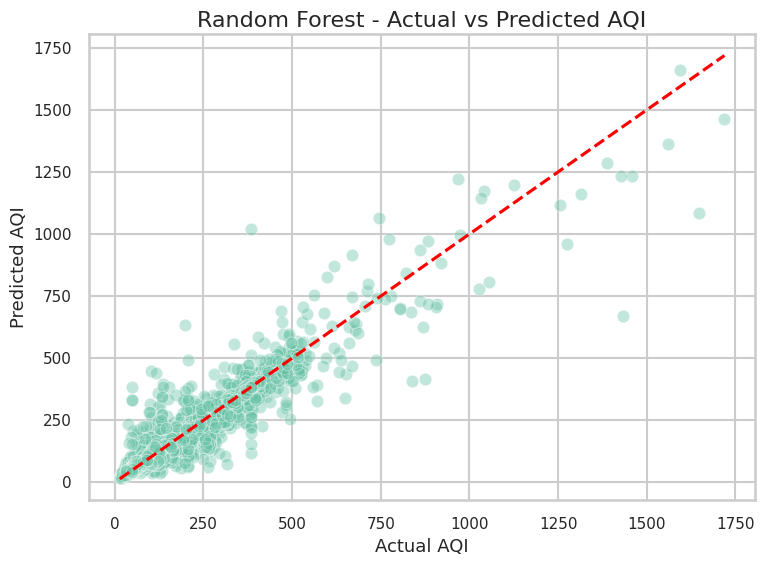

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot actual vs predicted AQI values for the Random Forest model
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_rf, alpha=0.4)

# Diagonal reference line (perfect predictions)
plt.plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()],
    'r--'
)

plt.xlabel("Actual AQI")
plt.ylabel("Predicted AQI")
plt.title("Random Forest - Actual vs Predicted AQI")
plt.tight_layout()
plt.show()


#### Feature Importance (Random Forest)

I investigated the features' importance in the Random Forest model to evaluate how the input variables affected the prediction of the AQI. The feature importance values indicate the extent to which each feature decreases the average prediction error over all trees of the forest.

I put together the numerical features with one-hot encoded city features and derived the top 15 most important variables. PM2.5 and PM10 naturally come high up here; that is expected since particulate matters will have an immediate effect on air quality. A couple of one-hot coded city features also stand quite high, which in turn implies that the location itself is affecting AQI patterns derived from the source of pollution and the prevailing weather conditions.

The breakdown clarifies how the predictions are made by Random Forest and establishes that the key pollutants do impact the results significantly.


/tmp/ipython-input-249183889.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=fi_df, x="Importance", y="Feature", palette="viridis")


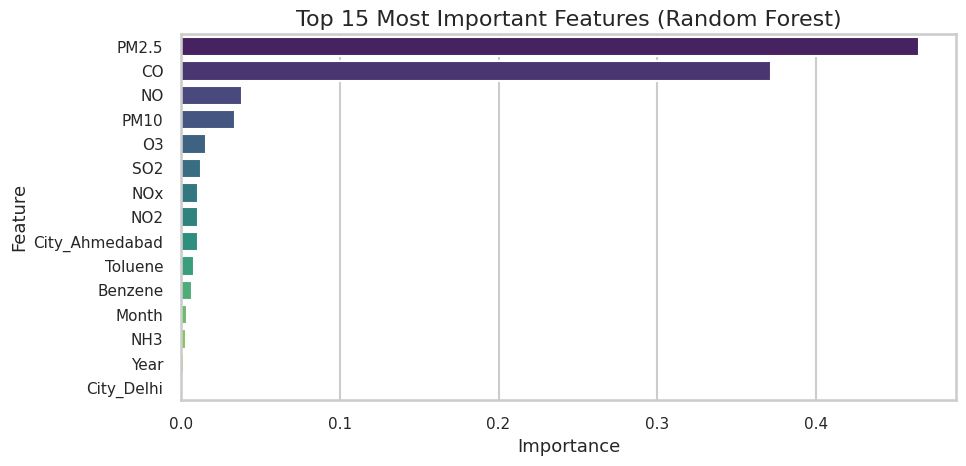

In [30]:
# Extract one-hot encoded city feature names
ohe = rf_model.named_steps["preprocess"].named_transformers_["cat"]["onehot"]
cat_names = list(ohe.get_feature_names_out(["City"]))

# Combine numeric and categorical feature names
feature_names = num_features + cat_names

# Get feature importances from the Random Forest model
importances = rf_model.named_steps["model"].feature_importances_

# Create a DataFrame for easier viewing
fi_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
}).sort_values(by="Importance", ascending=False).head(15)

# Plot the top 15 features
plt.figure(figsize=(10, 5))
sns.barplot(data=fi_df, x="Importance", y="Feature", palette="viridis")
plt.title("Top 15 Most Important Features (Random Forest)")
plt.tight_layout()
plt.show()


### Model Evaluation Summary

This work has been done with training two models using pollutant measurements, along with city information and time-related features for predicting value of AQI.

1. **Linear Regression**  
   This was the first model for prediction, which produced an MAE of around 31.79 and R² score of 0.79.  
   The model can pick up the general relationships in the data, but it struggles on deeper, non-linear patterns which affect air quality.

2. **Random Forest Regressor**  
   *This model performed much better* MAE of 13.39 and R² score of 0.95 means that almost all of the variation in AQI is explained with reference to this model.  
   This evidence of a strong performance indicates that Random Forest is able to capture interactions between pollutants and the influence of different cities far better than the linear model.

Clearly, prediction of AQI is not a simple linear problem; given that this comparison is made. The model should be the Random Forest prediction engine in this case, as it takes care of the non-linearities outside the base form of prediction and recommends it for use in the application developed in Task 4.


→ Link for the streamlit web application

   https://cmp-7005-final-assignment-wzczuhwybvp3hkysssppfc.streamlit.app/

**→ Link for the github repository**

https://github.com/535amar/st20338869_CMP_PRC_1

**→ Screenshots of the git commit history and the working of streamlit app:**

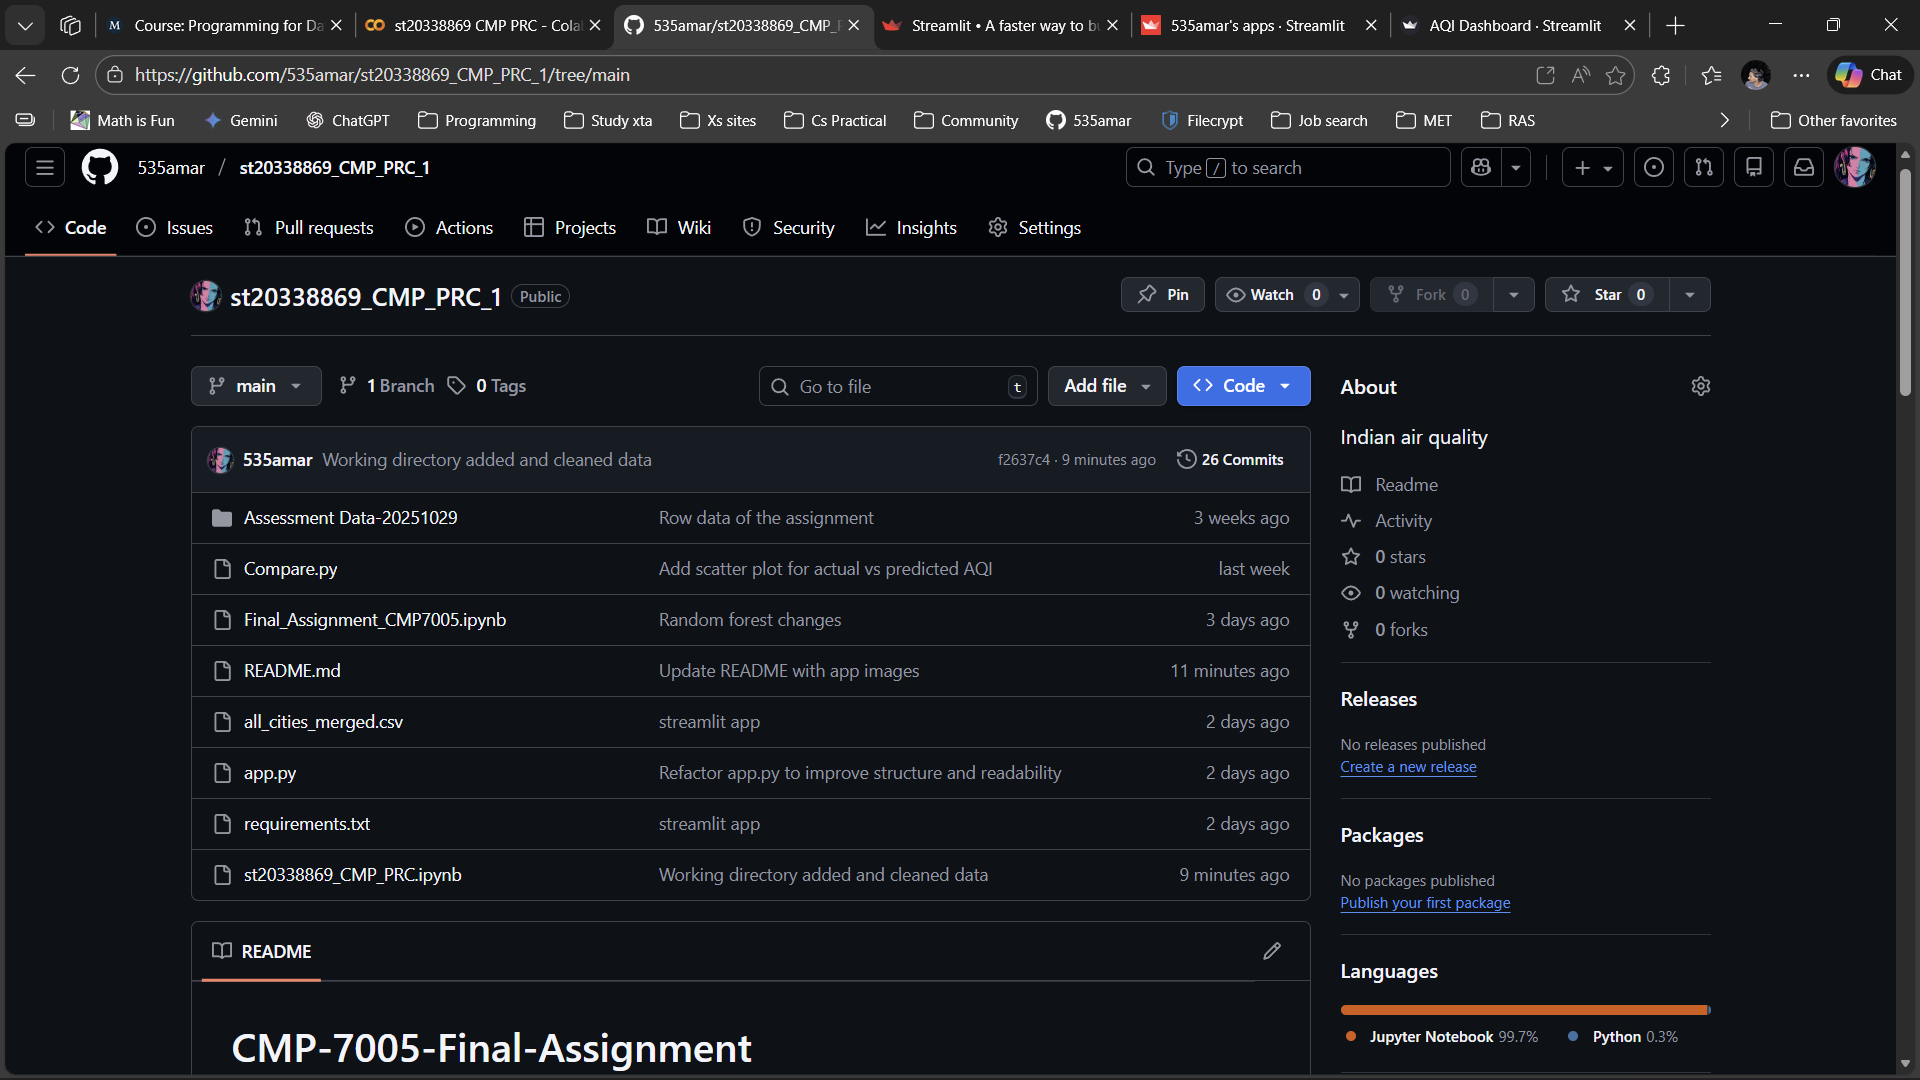

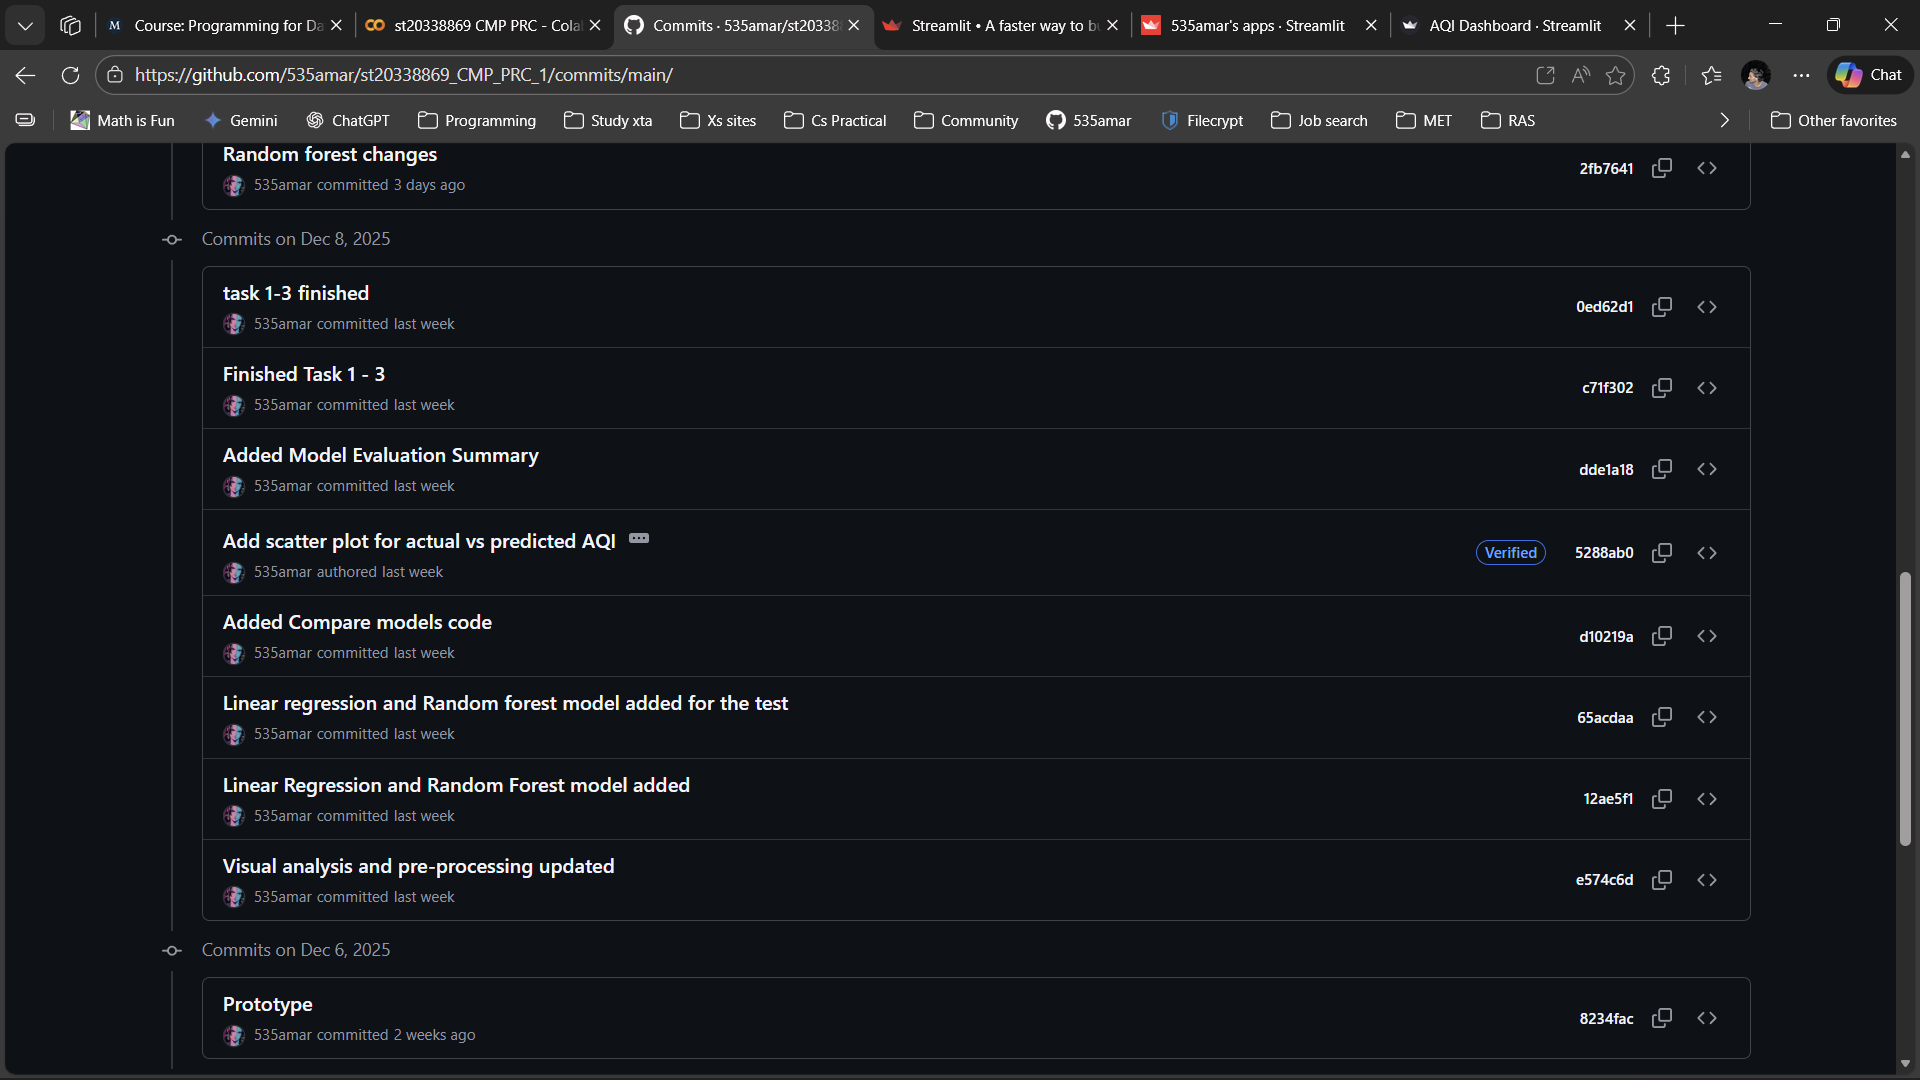

Used VScode as IDE

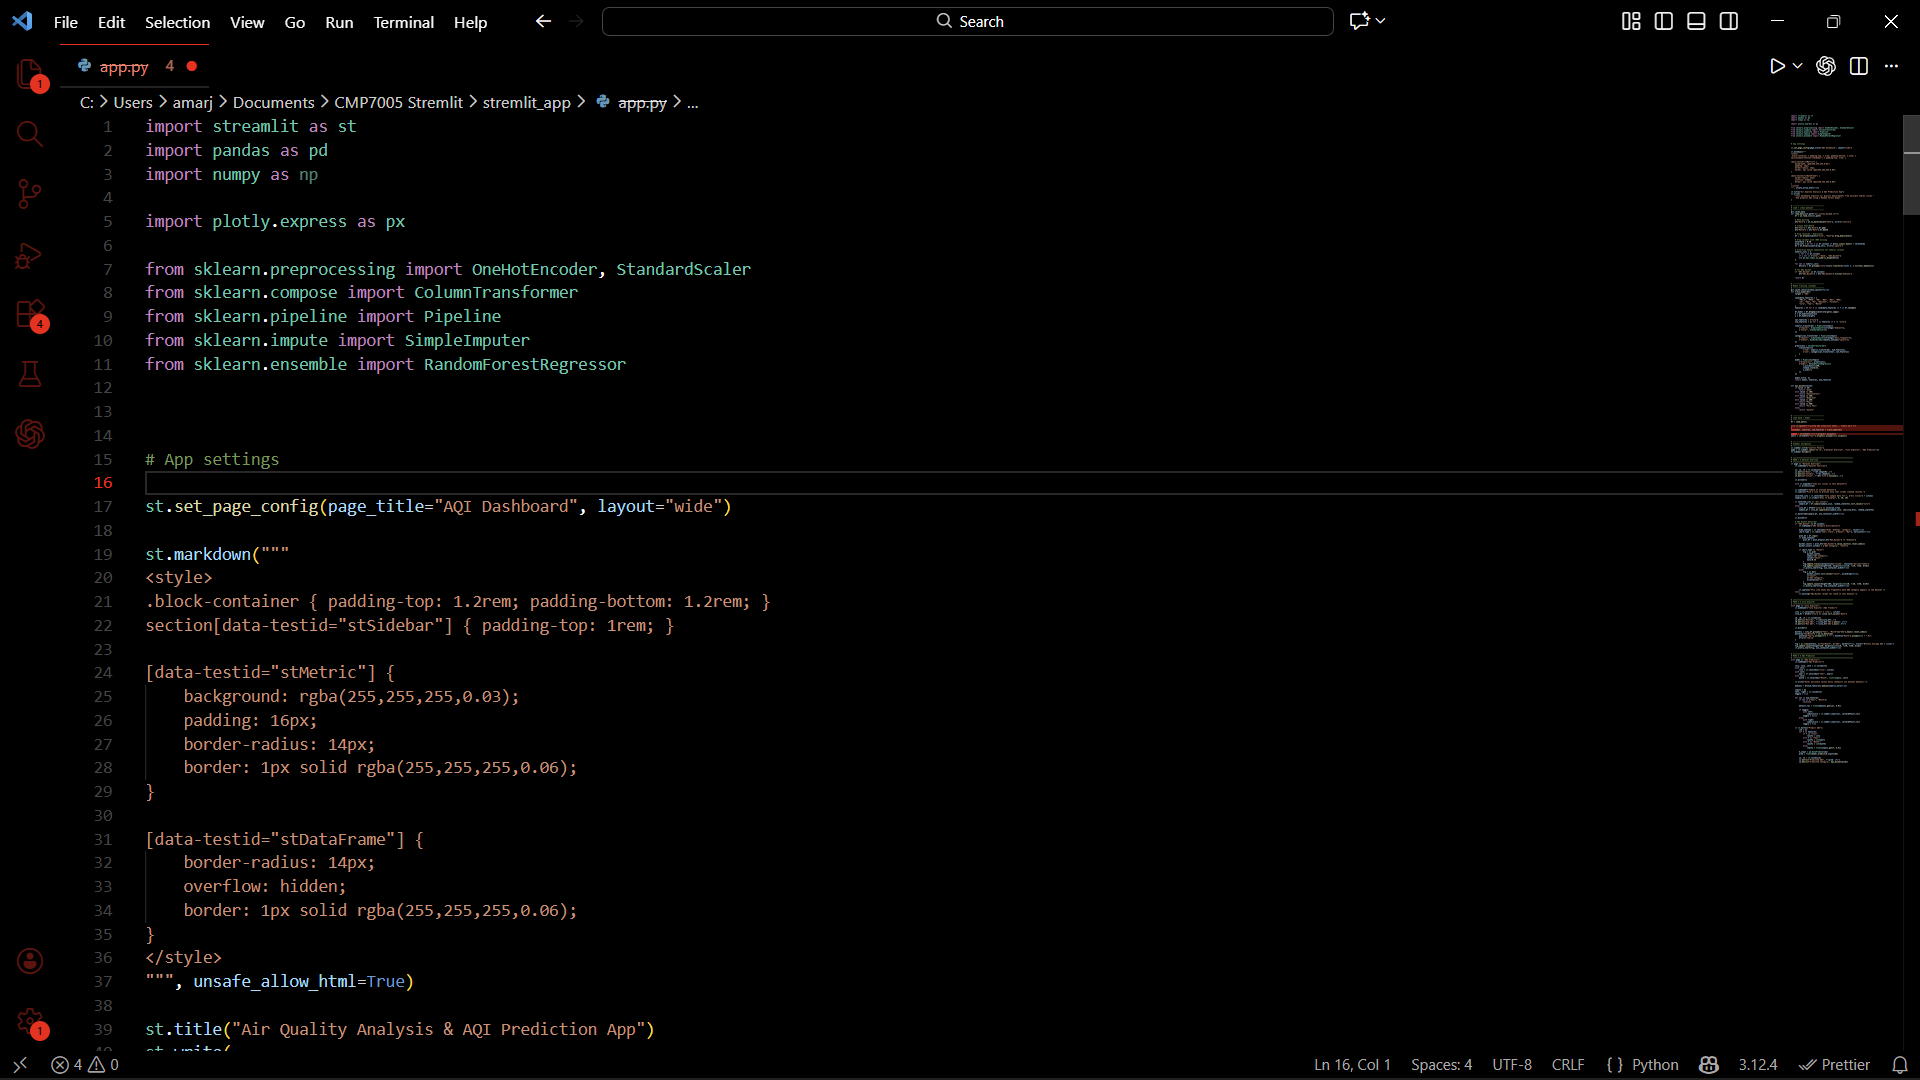

**Streamlit web app**

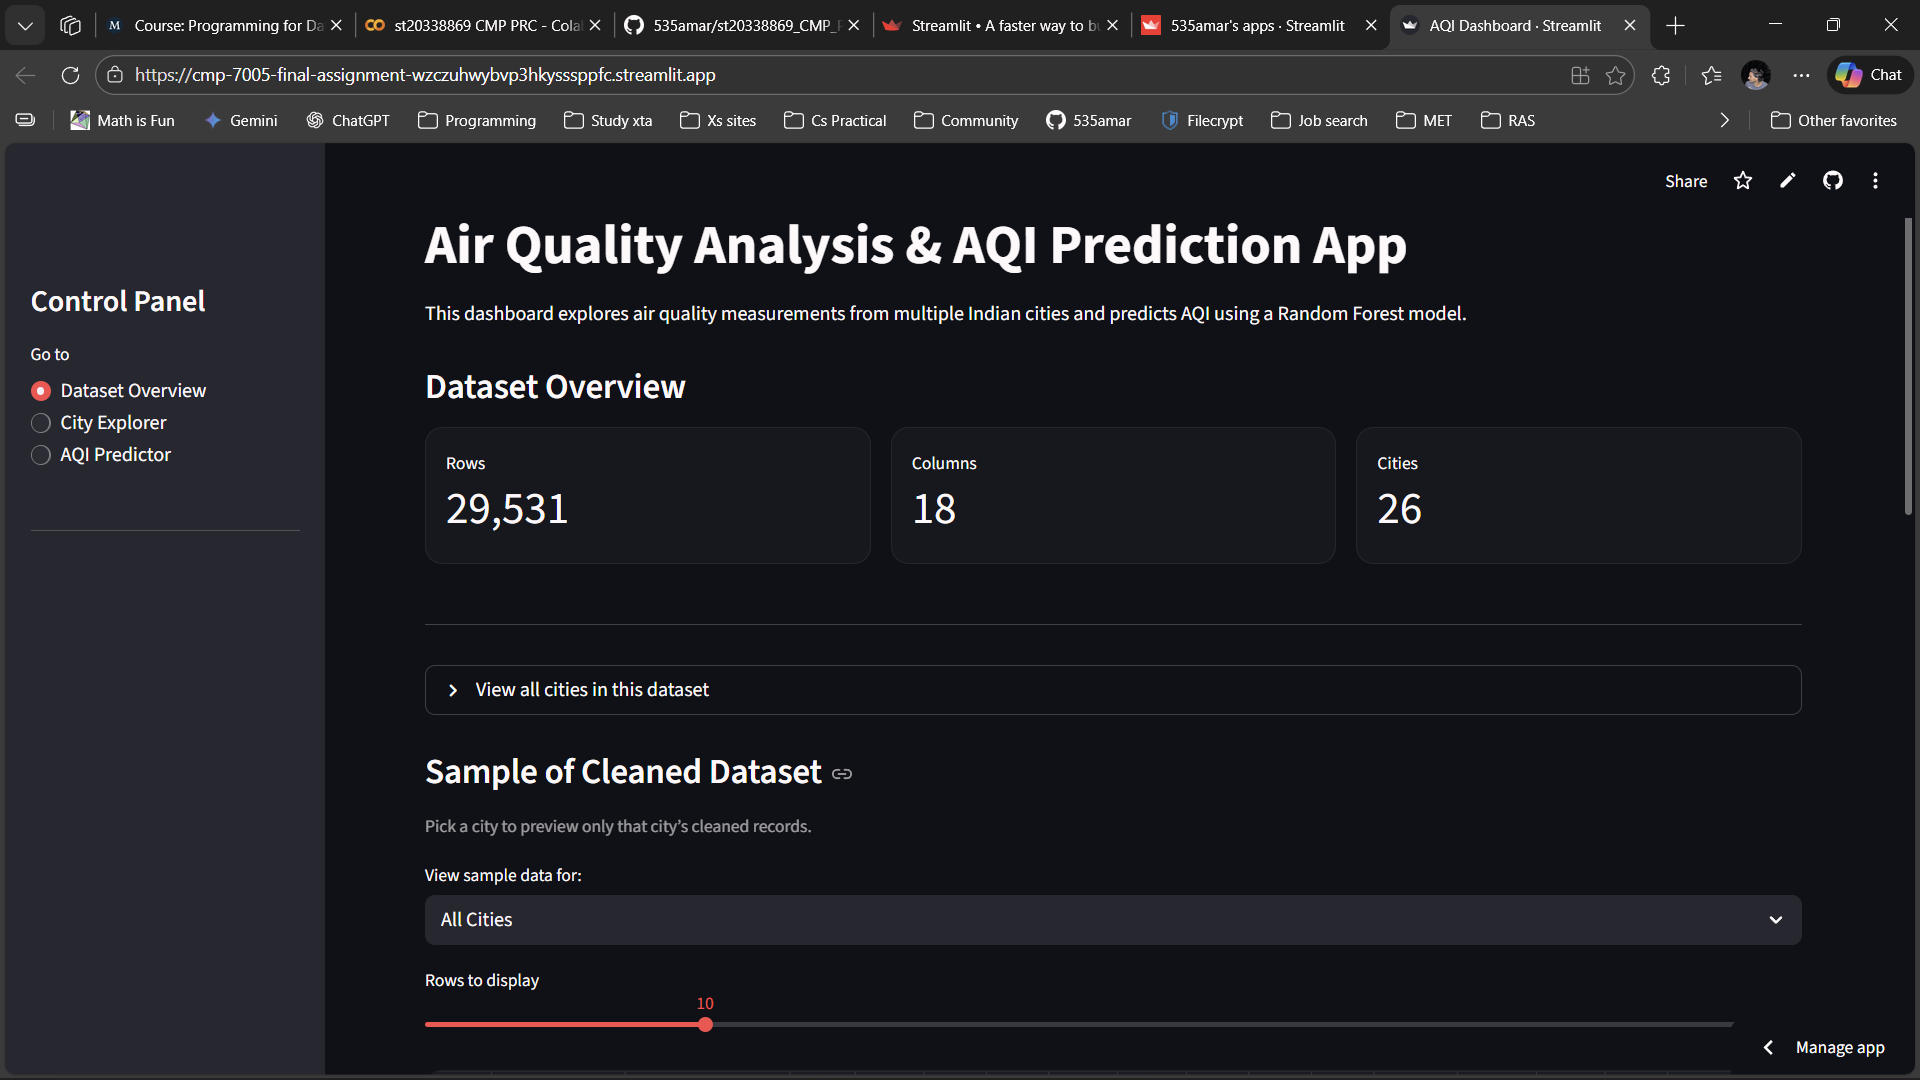

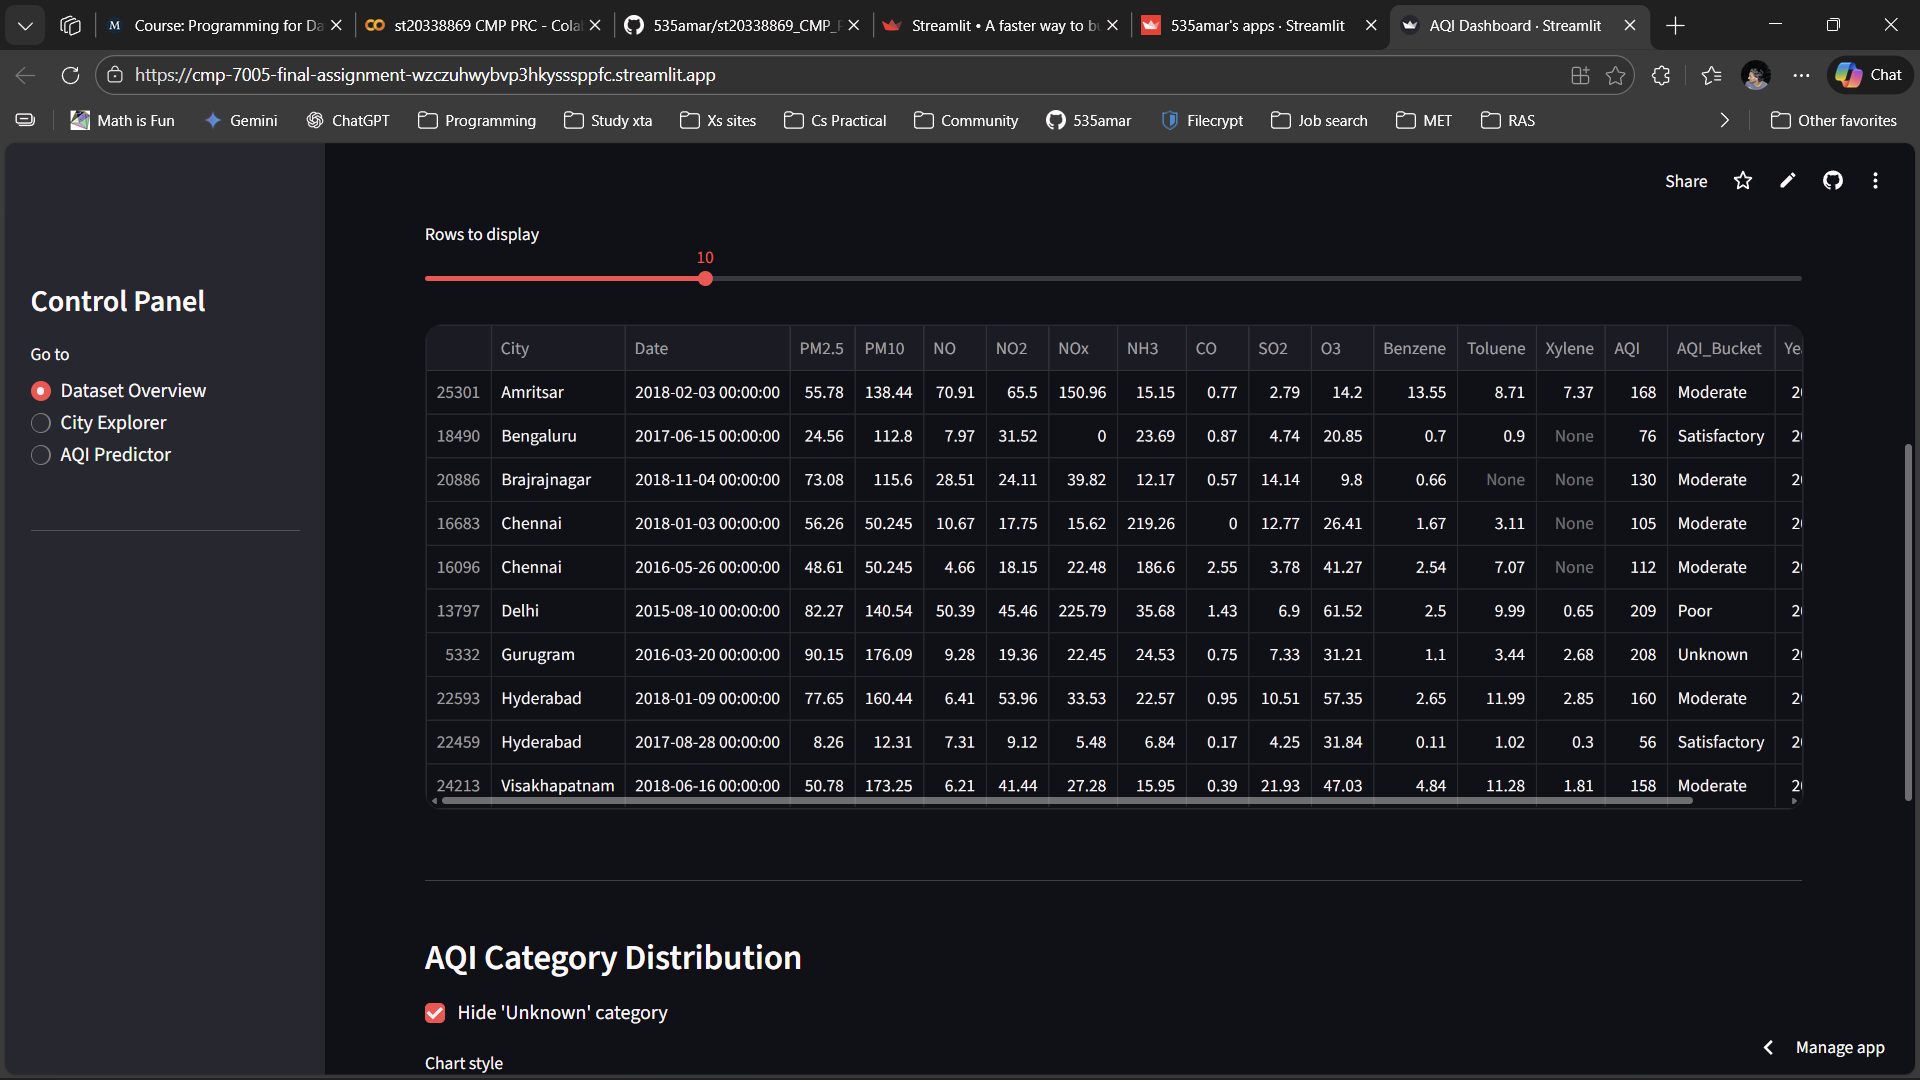

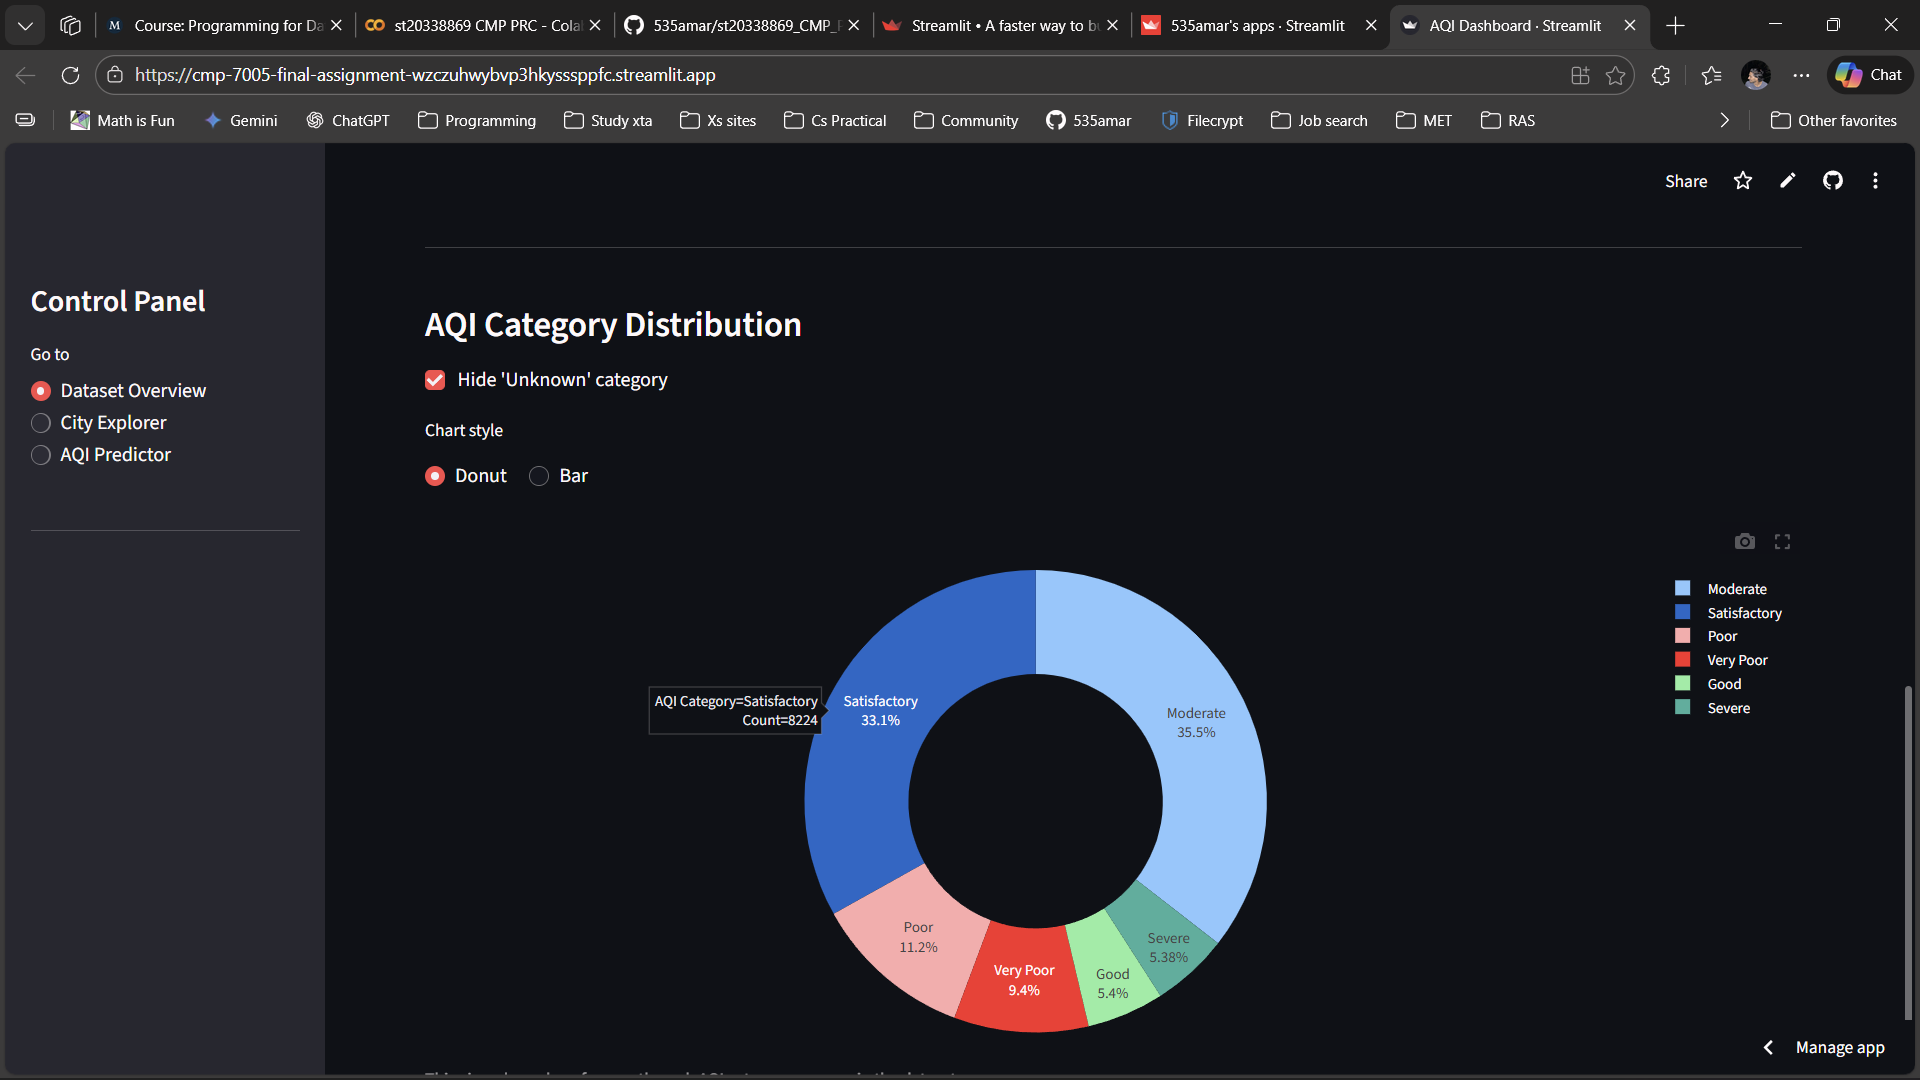

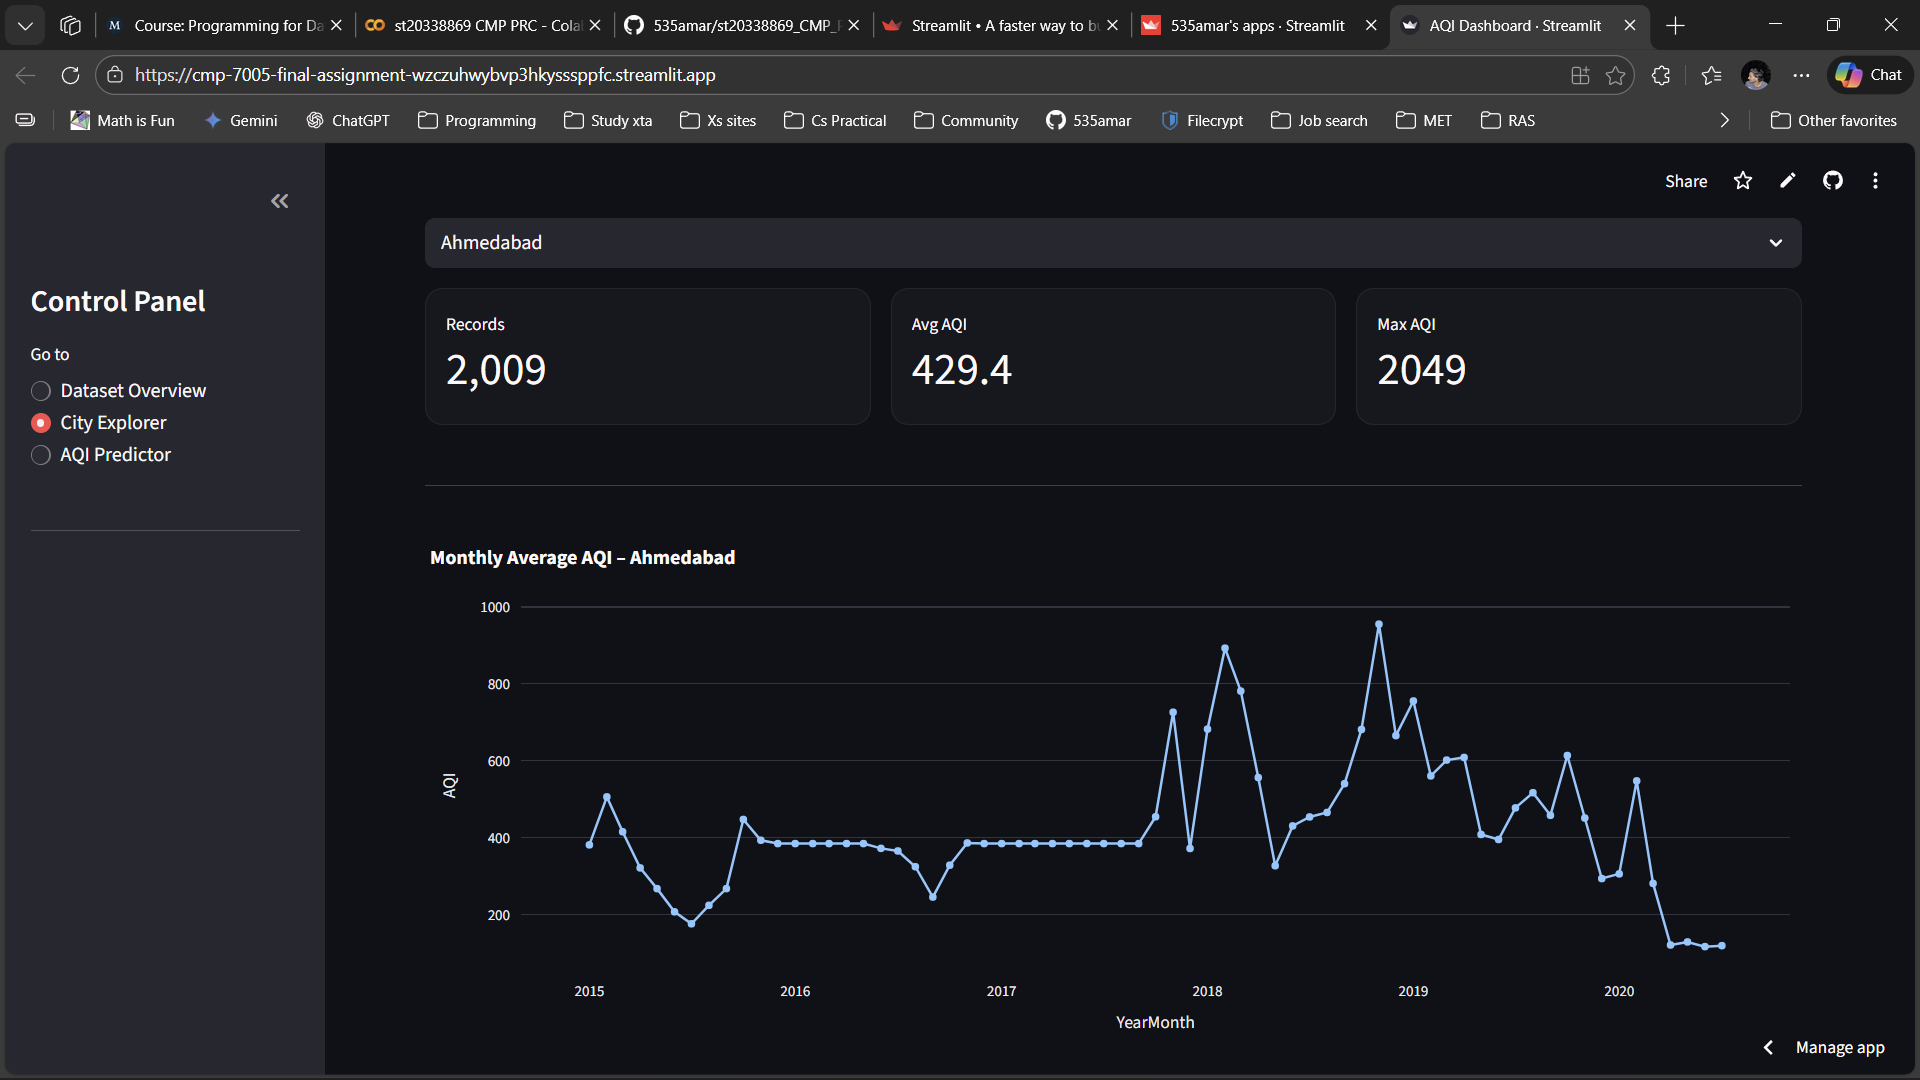

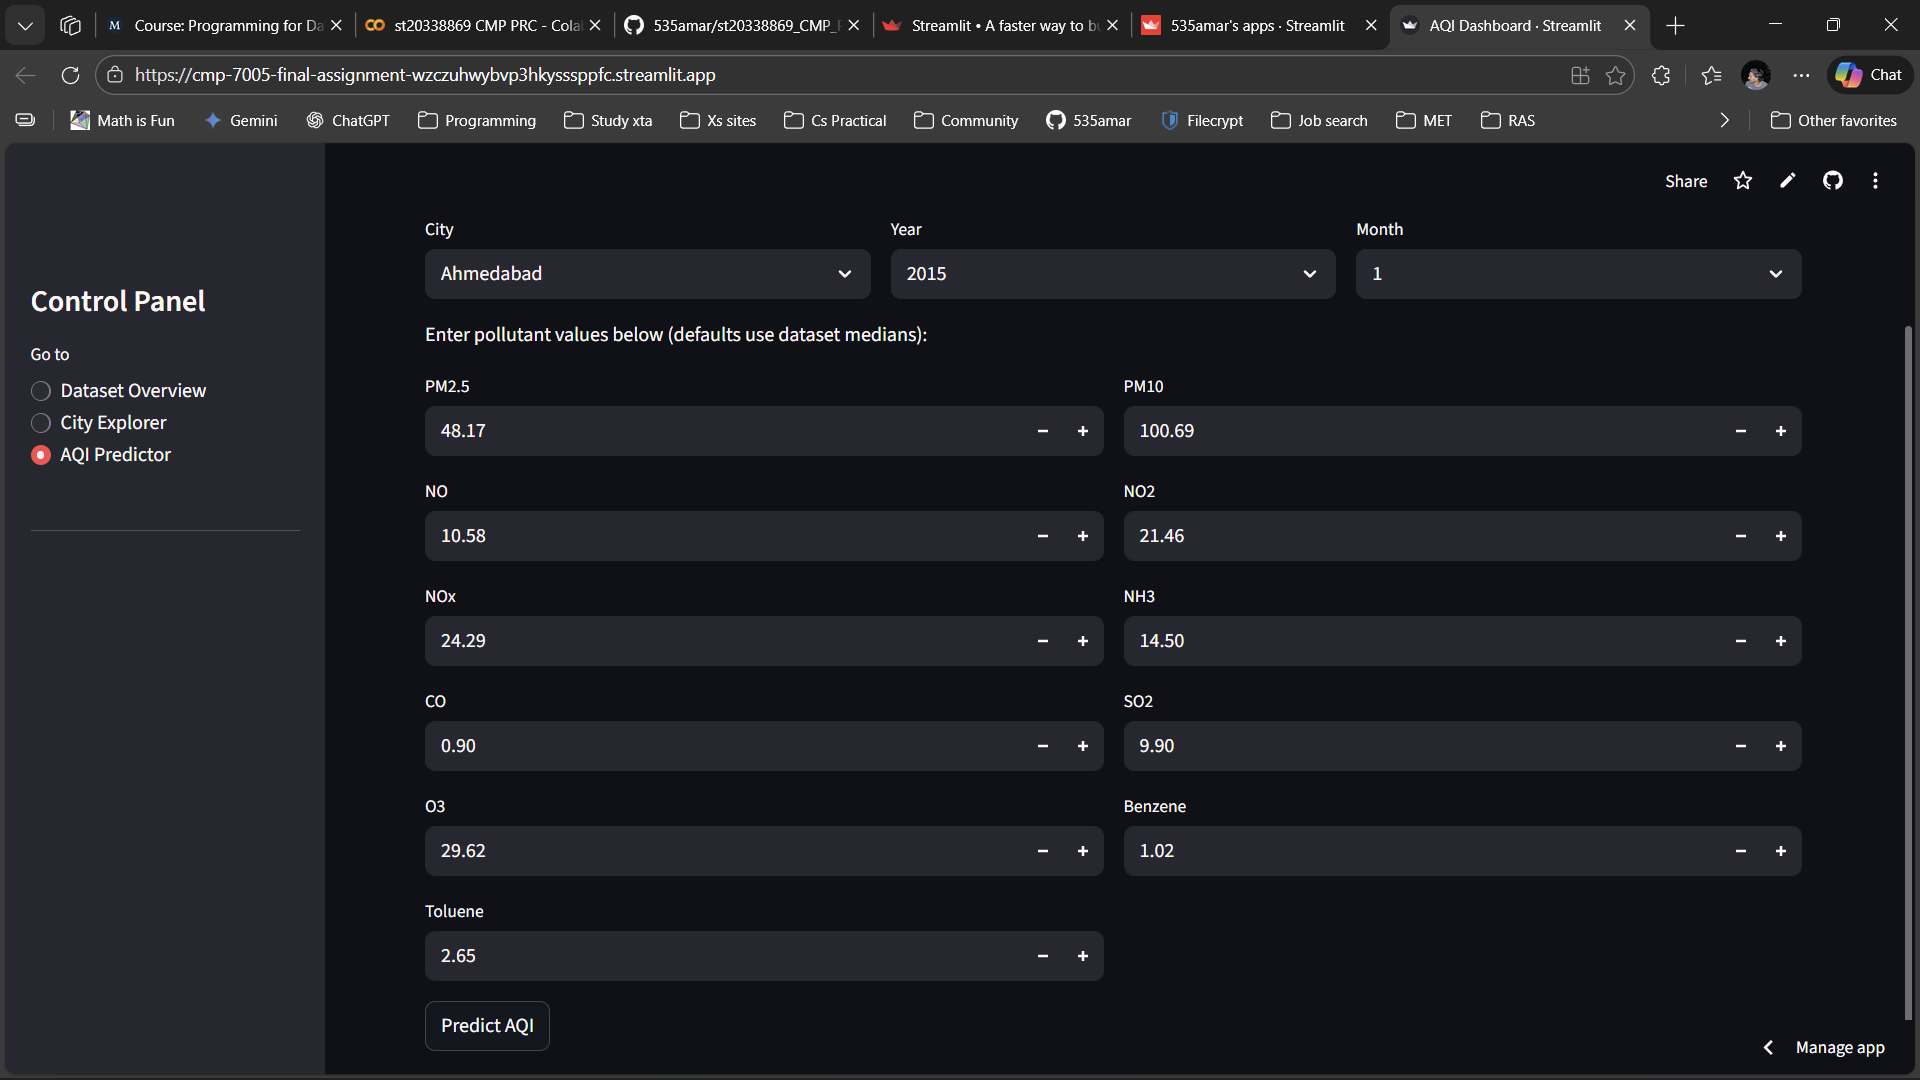

**Ai acknowledgement:**

I acknowledge that i used Ai tools while i prepared this assignment.

 -chatgpt

 -codex

I used these mostly for to review my own content and code to modified for better idea clarifification. The final work were all done by me and decision and strecture whole assignment are completed without any ai's help.